In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Data Clean and preprocessing

- 1.1 mof name should be removed. 
- 1.2 some electronic configuration are wrong. 
>- 1.2.1 538, 543, 549 are Zn, while 6p=10 and 3d=0, this data is wrong, should be corrected to 6p= 0 and 3d=10.
>- 1.2.2 145,178,223,340 are Gd, 4f=0, missed 7 electrons , but it should be 7
>- 1.2.3 519 is Mn,4s=0 missed 2 electron, should be corrected to 4s=2
>- 1.2.4 552 is Yb , 6p=6, it should be 0.

In [2]:
df=pd.read_csv(r'./finger_train.csv')

In [3]:
df.head()

,mof,1s,2s,3s,4s,5s,6s,7s,2p,3p,...,4d,5d,6d,4f,5f,metal,linker1smi,oxidation_state,temperature,time
0,WIRMOB_clean,2,2,2,2,0,0,0,6,6,...,0,0,0,0,0,Zn,O=C(O)c1ccc(COc2c3c(c(OCc4ccc(C(=O)O)cc4)c4c2C...,2,110,72.0
1,VIXTUT_clean,2,2,2,2,0,0,0,6,6,...,0,0,0,0,0,Zn,c1cc(CCc2ccncc2)ccn1,2,85,72.0
2,PODKUQ_clean,2,2,2,1,0,0,0,6,6,...,0,0,0,0,0,Cu,O=C(O)c1cc(C(=O)O)cc(-n2cc(-c3ccc(-c4cc(-c5ccc...,2,80,24.0
3,IKUTOZ_clean,2,2,2,2,2,2,0,6,6,...,10,0,0,10,0,Dy,O=C(O)c1c2ccccc2c(C(=O)O)c2ccccc12,3,95,24.0
4,LADHEF_clean,2,2,2,2,0,0,0,6,6,...,0,0,0,0,0,Zn,c1nnc[nH]1,2,80,72.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mof              560 non-null    object 
 1   1s               560 non-null    int64  
 2   2s               560 non-null    int64  
 3   3s               560 non-null    int64  
 4   4s               560 non-null    int64  
 5   5s               560 non-null    int64  
 6   6s               560 non-null    int64  
 7   7s               560 non-null    int64  
 8   2p               560 non-null    int64  
 9   3p               560 non-null    int64  
 10  4p               560 non-null    int64  
 11  5p               560 non-null    int64  
 12  6p               560 non-null    int64  
 13  3d               560 non-null    int64  
 14  4d               560 non-null    int64  
 15  5d               560 non-null    int64  
 16  6d               560 non-null    int64  
 17  4f              

In [5]:
df.isnull().sum()  #No missing value

mof                0
1s                 0
2s                 0
3s                 0
4s                 0
5s                 0
6s                 0
7s                 0
2p                 0
3p                 0
4p                 0
5p                 0
6p                 0
3d                 0
4d                 0
5d                 0
6d                 0
4f                 0
5f                 0
metal              0
linker1smi         0
oxidation_state    0
temperature        0
time               0
dtype: int64

In [6]:
dic={'dtype':[], 'num_uni':[],'uni_value':[],'uni_value_counts':[]}
for i in df.columns:
    dtype=df[i].dtype
    num_uni=df[i].nunique()
    uni_value=df[i].unique()
    uni_value_counts=df[i].value_counts(sort=False).to_dict().values()
    dic['dtype'].append(dtype)
    dic['num_uni'].append(num_uni)
    dic['uni_value'].append(uni_value)
    dic['uni_value_counts'].append(uni_value_counts)
pd.DataFrame(dic,index=df.columns)

,dtype,num_uni,uni_value,uni_value_counts
mof,object,557,"[WIRMOB_clean, VIXTUT_clean, PODKUQ_clean, IKU...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1s,int64,1,[2],(560)
2s,int64,1,[2],(560)
3s,int64,2,"[2, 1]","(559, 1)"
4s,int64,3,"[2, 1, 0]","(424, 123, 13)"
5s,int64,3,"[0, 2, 1]","(381, 178, 1)"
6s,int64,2,"[0, 2]","(505, 55)"
7s,int64,2,"[0, 2]","(555, 5)"
2p,int64,1,[6],(560)
3p,int64,2,"[6, 0]","(548, 12)"


In [7]:
df.columns

Index(['mof', '1s', '2s', '3s', '4s', '5s', '6s', '7s', '2p', '3p', '4p', '5p',
       '6p', '3d', '4d', '5d', '6d', '4f', '5f', 'metal', 'linker1smi',
       'oxidation_state', 'temperature', 'time'],
      dtype='object')

In [8]:
df[df['6p']==10] # Zn don't have 6p =10, we need to check the electronic structure

,mof,1s,2s,3s,4s,5s,6s,7s,2p,3p,...,4d,5d,6d,4f,5f,metal,linker1smi,oxidation_state,temperature,time
538,110,2,2,2,2,0,0,0,6,6,...,0,0,0,0,0,Zn,[O-]C(=O)c1ccc(cc1)[Si](c1ccc(cc1)C(=O)O)(c1cc...,2,85,96.0
543,66,2,2,2,2,0,0,0,6,6,...,0,0,0,0,0,Zn,CCCCCCOc1cc(c2ccc(cc2)C(=O)[O-])c(cc1c1ccc(cc1...,2,80,24.0
549,63,2,2,2,2,0,0,0,6,6,...,0,0,0,0,0,Zn,[CH2]Oc1cc(C2=CC=C([C]=C2)C(=O)[O-])c(cc1c1ccc...,2,80,24.0


In [9]:
df['total electrons']=df[['1s', '2s', '3s', '4s', '5s', '6s', '7s', '2p', '3p', '4p', '5p','6p', '3d', '4d', '5d', '6d', '4f', '5f']].sum(axis=1)

In [10]:
df['6p'].iloc[[538,543,549]]=0
df['3d'].iloc[[538,543,549]]=10
df['3d'].iloc[[538,543,549]]

C:\Users\JingyunYe\AppData\Local\Temp\ipykernel_22188\1864291317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['6p'].iloc[[538,543,549]]=0
C:\Users\JingyunYe\AppData\Local\Temp\ipykernel_22188\1864291317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['3d'].iloc[[538,543,549]]=10


538    10
543    10
549    10
Name: 3d, dtype: int64

In [11]:
df['metal'].unique()

array(['Zn', 'Cu', 'Dy', 'Eu', 'Cd', 'Co', 'Mn', 'La', 'In', 'Tb', 'Mg',
       'Ni', 'Gd', 'Y', 'Fe', 'Th', 'Zr', 'K', 'Rb', 'Yb', 'Na'],
      dtype=object)

In [12]:
element={'Zn':30, 'Cu':29, 'Dy':66, 'Eu':63, 'Cd':48, 'Co':27, 'Mn':25, 'La':57, 'In':49, 'Tb':65, 'Mg':12,
       'Ni':28, 'Gd':64, 'Y':39, 'Fe':26, 'Th':90, 'Zr':40, 'K':19, 'Rb':37, 'Yb':70, 'Na':11}

df['metal']=df['metal'].map(lambda x: element[x] if x in element.keys() else x)

In [13]:
df['diff'] = df['metal'].sub(df['total electrons'])
df['diff'].value_counts()

diff
 0    554
 7      4
 2      1
-6      1
Name: count, dtype: int64

In [14]:
df[df['diff']==7]

,mof,1s,2s,3s,4s,5s,6s,7s,2p,3p,...,6d,4f,5f,metal,linker1smi,oxidation_state,temperature,time,total electrons,diff
145,QUPDEL01_clean,2,2,2,2,2,2,0,6,6,...,0,0,0,64,O=C(O)C=CC(=O)O,3,140,48.0,57,7
178,QUHMOX_clean,2,2,2,2,2,2,0,6,6,...,0,0,0,64,O=S(=O)(O)O,3,140,48.0,57,7
223,INOVEN_clean,2,2,2,2,2,2,0,6,6,...,0,0,0,64,O=C(O)c1ccc(NNc2cc(C(=O)O)cc(C(=O)O)c2)cc1,3,60,168.0,57,7
340,ISUGIN_clean,2,2,2,2,2,2,0,6,6,...,0,0,0,64,O=C(O)C1C=CC=NC1=O,3,180,168.0,57,7


In [15]:
df['4f'].iloc[[145,178,223,340]]=7

C:\Users\JingyunYe\AppData\Local\Temp\ipykernel_22188\2711231917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['4f'].iloc[[145,178,223,340]]=7


In [16]:
df[df['diff']==2]

,mof,1s,2s,3s,4s,5s,6s,7s,2p,3p,...,6d,4f,5f,metal,linker1smi,oxidation_state,temperature,time,total electrons,diff
519,41,2,2,2,0,0,0,0,6,6,...,0,0,0,25,[O-]C(=O)c1ccc(cc1)[Si](c1ccc(cc1)C(=O)[O-])(c...,2,120,12.0,23,2


In [17]:
df['4s'][519]=2

C:\Users\JingyunYe\AppData\Local\Temp\ipykernel_22188\1416306698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['4s'][519]=2


In [18]:
df[df['diff']==-6]

,mof,1s,2s,3s,4s,5s,6s,7s,2p,3p,...,6d,4f,5f,metal,linker1smi,oxidation_state,temperature,time,total electrons,diff
552,47,2,2,2,2,2,2,0,6,6,...,0,14,0,70,[O-]C(=O)C12c3ccccc3C(c3c1cccc3)C1(c3c(C2c2ccc...,3,60,72.0,76,-6


In [19]:
df['6p'][552]=0

C:\Users\JingyunYe\AppData\Local\Temp\ipykernel_22188\3608506138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['6p'][552]=0


In [20]:
df['total electrons']=df[['1s', '2s', '3s', '4s', '5s', '6s', '7s', '2p', '3p', '4p', '5p','6p', '3d', '4d', '5d', '6d', '4f', '5f']].sum(axis=1)
df['diff'] = df['metal'].sub(df['total electrons'])
df['diff'].value_counts()

diff
0    560
Name: count, dtype: int64

In [21]:
df.head()

,mof,1s,2s,3s,4s,5s,6s,7s,2p,3p,...,6d,4f,5f,metal,linker1smi,oxidation_state,temperature,time,total electrons,diff
0,WIRMOB_clean,2,2,2,2,0,0,0,6,6,...,0,0,0,30,O=C(O)c1ccc(COc2c3c(c(OCc4ccc(C(=O)O)cc4)c4c2C...,2,110,72.0,30,0
1,VIXTUT_clean,2,2,2,2,0,0,0,6,6,...,0,0,0,30,c1cc(CCc2ccncc2)ccn1,2,85,72.0,30,0
2,PODKUQ_clean,2,2,2,1,0,0,0,6,6,...,0,0,0,29,O=C(O)c1cc(C(=O)O)cc(-n2cc(-c3ccc(-c4cc(-c5ccc...,2,80,24.0,29,0
3,IKUTOZ_clean,2,2,2,2,2,2,0,6,6,...,0,10,0,66,O=C(O)c1c2ccccc2c(C(=O)O)c2ccccc12,3,95,24.0,66,0
4,LADHEF_clean,2,2,2,2,0,0,0,6,6,...,0,0,0,30,c1nnc[nH]1,2,80,72.0,30,0


In [22]:
df.drop('mof',axis=1, inplace=True) # remove Compund
df.drop('total electrons',axis=1, inplace=True)
df.drop('diff',axis=1, inplace=True)
df.head()

,1s,2s,3s,4s,5s,6s,7s,2p,3p,4p,...,4d,5d,6d,4f,5f,metal,linker1smi,oxidation_state,temperature,time
0,2,2,2,2,0,0,0,6,6,0,...,0,0,0,0,0,30,O=C(O)c1ccc(COc2c3c(c(OCc4ccc(C(=O)O)cc4)c4c2C...,2,110,72.0
1,2,2,2,2,0,0,0,6,6,0,...,0,0,0,0,0,30,c1cc(CCc2ccncc2)ccn1,2,85,72.0
2,2,2,2,1,0,0,0,6,6,0,...,0,0,0,0,0,29,O=C(O)c1cc(C(=O)O)cc(-n2cc(-c3ccc(-c4cc(-c5ccc...,2,80,24.0
3,2,2,2,2,2,2,0,6,6,6,...,10,0,0,10,0,66,O=C(O)c1c2ccccc2c(C(=O)O)c2ccccc12,3,95,24.0
4,2,2,2,2,0,0,0,6,6,0,...,0,0,0,0,0,30,c1nnc[nH]1,2,80,72.0


In [23]:
df['temperature'].value_counts()

temperature
120    106
100     56
80      50
85      48
160     47
180     31
150     27
140     26
110     23
90      22
130     19
95      13
170     12
60      12
25      11
105     11
65      11
75       7
70       6
200      4
115      3
165      2
220      2
55       2
102      2
30       2
175      1
135      1
210      1
161      1
5        1
Name: count, dtype: int64

In [24]:
feature=list(df.columns)
target1='temperature'
target2='time'
feature.remove(target1)
feature.remove(target2)

### Figureprint

In [159]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, AllChem, Descriptors
from rdkit.Chem.Draw import rdMolDraw2D, DrawMorganBits
from rdkit import DataStructs

In [167]:
mol1 = df['linker1smi'].apply(Chem.MolFromSmiles)
df['MolWt'] = mol1.apply(Descriptors.ExactMolWt)
df['TPSA'] = mol1.apply(Chem.rdMolDescriptors.CalcTPSA)
df['nRotB'] = mol1.apply(Descriptors.NumRotatableBonds)
df['HBD'] = mol1.apply(Descriptors.NumHDonors)
df['HBA'] = mol1.apply(Descriptors.NumHAcceptors)
df['LogP'] = mol1.apply(Descriptors.MolLogP)

In [169]:
Fingerprint = lambda x: Chem.RDKFingerprint(x, maxPath=5, fpSize=64)
fingerprint1 = np.array(mol1.apply(Fingerprint).tolist())
fingerprint1 = pd.DataFrame(fingerprint1).add_prefix("fp1_")
fingerprint1.index = df.index

In [170]:
fingerprint1

,fp1_0,fp1_1,fp1_2,fp1_3,fp1_4,fp1_5,fp1_6,fp1_7,fp1_8,fp1_9,...,fp1_54,fp1_55,fp1_56,fp1_57,fp1_58,fp1_59,fp1_60,fp1_61,fp1_62,fp1_63
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
1,1,1,1,1,1,1,1,0,0,1,...,0,0,1,1,1,0,0,1,1,1
2,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,0,0,0,1,0,1,1,...,0,1,1,1,1,1,1,0,1,0
4,0,1,0,1,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
556,1,1,1,0,0,0,1,0,0,1,...,0,1,1,1,1,1,1,0,1,0
557,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
558,1,1,1,0,0,0,1,0,0,1,...,0,0,1,1,1,1,1,0,1,0


In [172]:
fingerprint1.shape

(560, 64)

In [105]:
linker=sorted(list(df['linker1smi'].unique()),key=len)
len(linker)

338

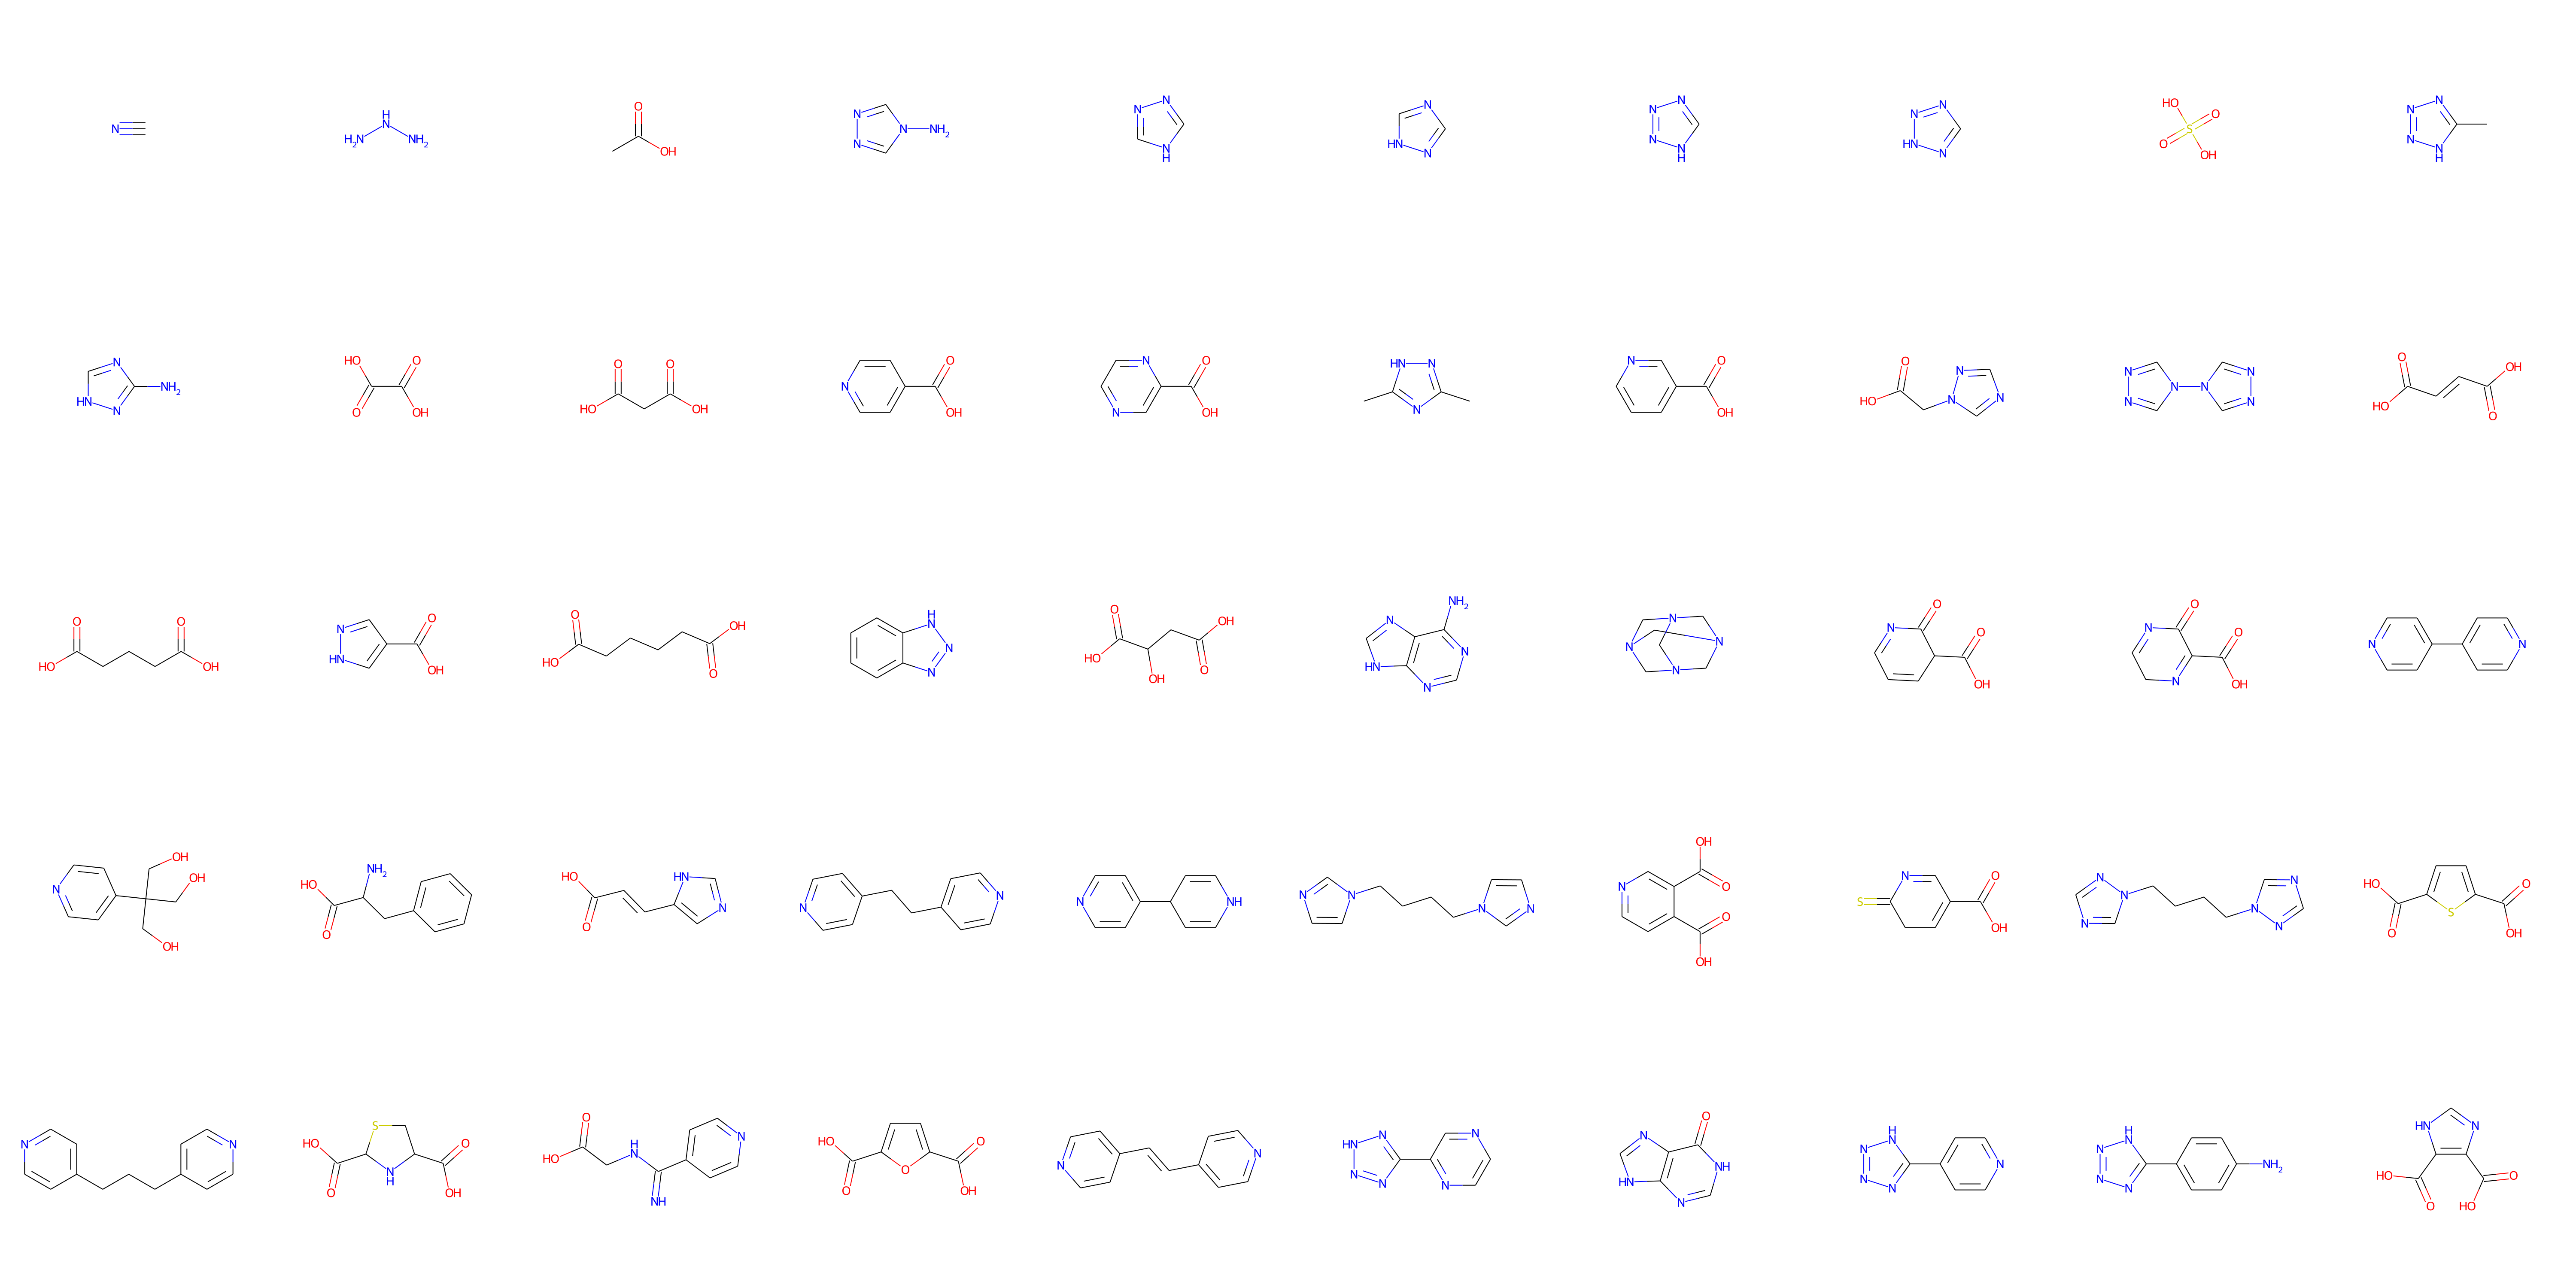

In [137]:

mol_list=[]
for smiles in linker:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)
img = Draw.MolsToGridImage(mol_list, molsPerRow=10, subImgSize=(600, 600),returnPNG=True)
img

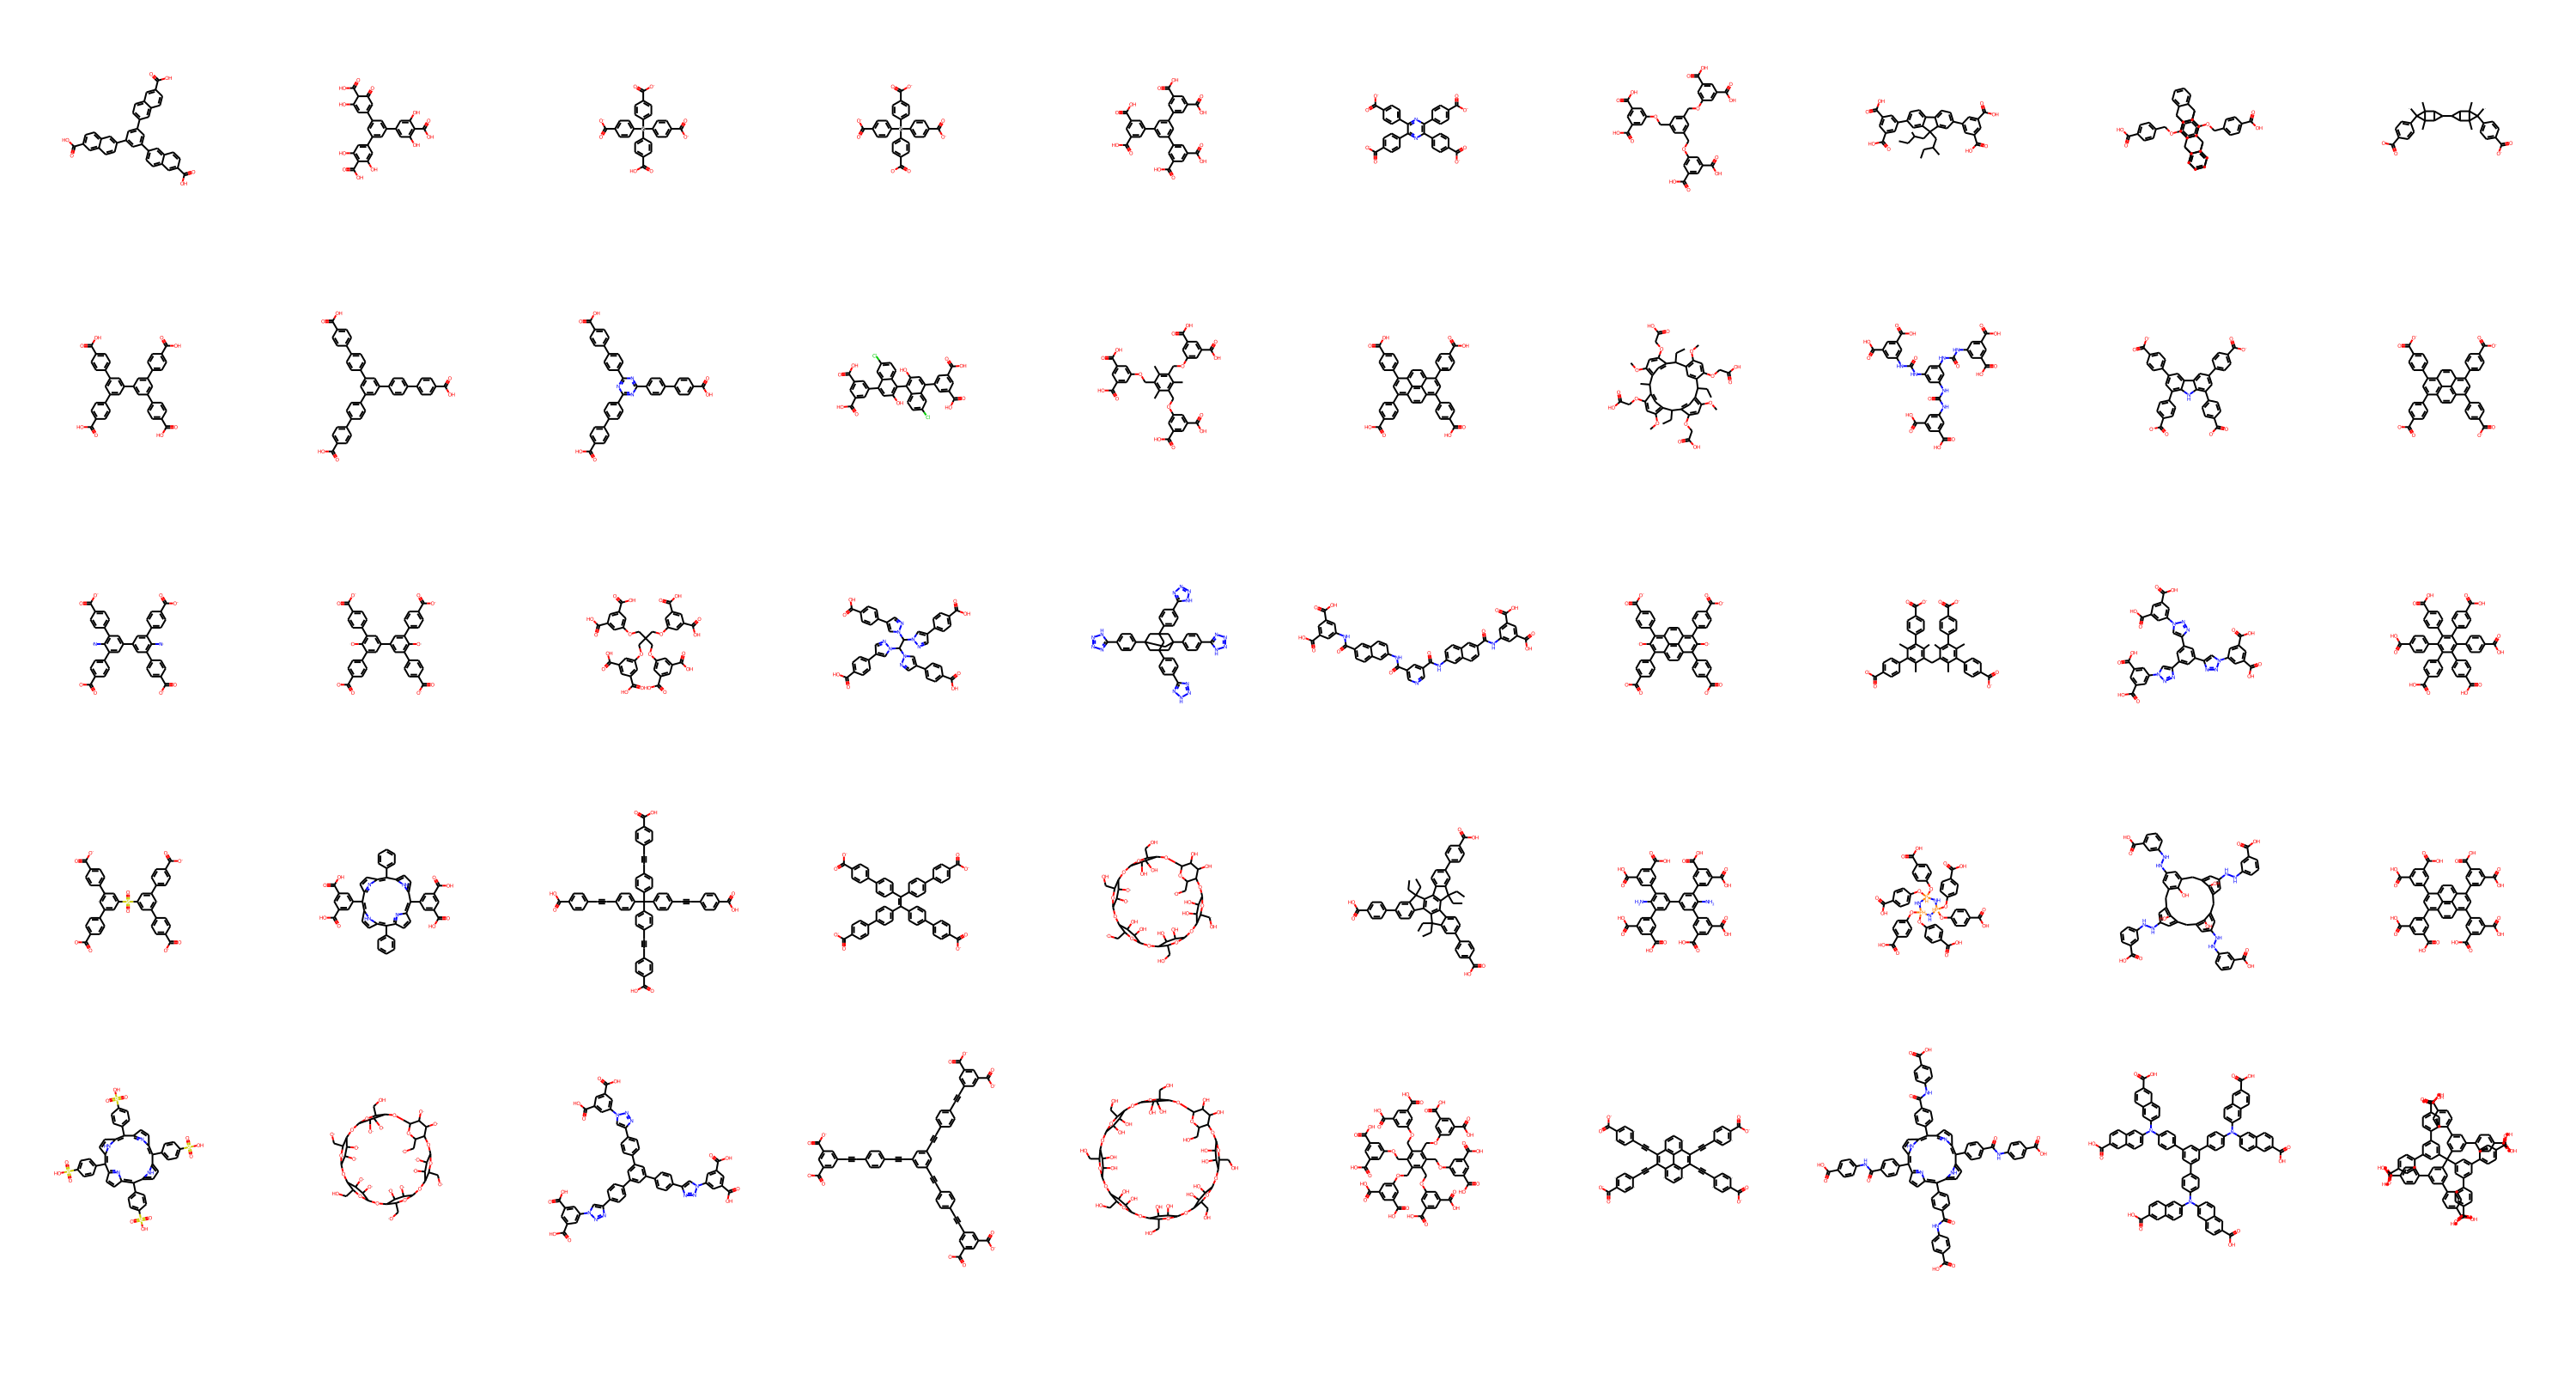

In [133]:
mol_list=[]
for smiles in linker:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)

drawer = rdMolDraw2D.MolDraw2DCairo(3000, 1600, 300, 300)
opts = drawer.drawOptions()
opts.prepareMolsBeforeDrawing = True
drawer.DrawMolecules(mol_list[-51:-1])
drawer.FinishDrawing()

IPython.display.Image(drawer.GetDrawingText())

In [135]:
drawer.WriteDrawingText("last50.png")

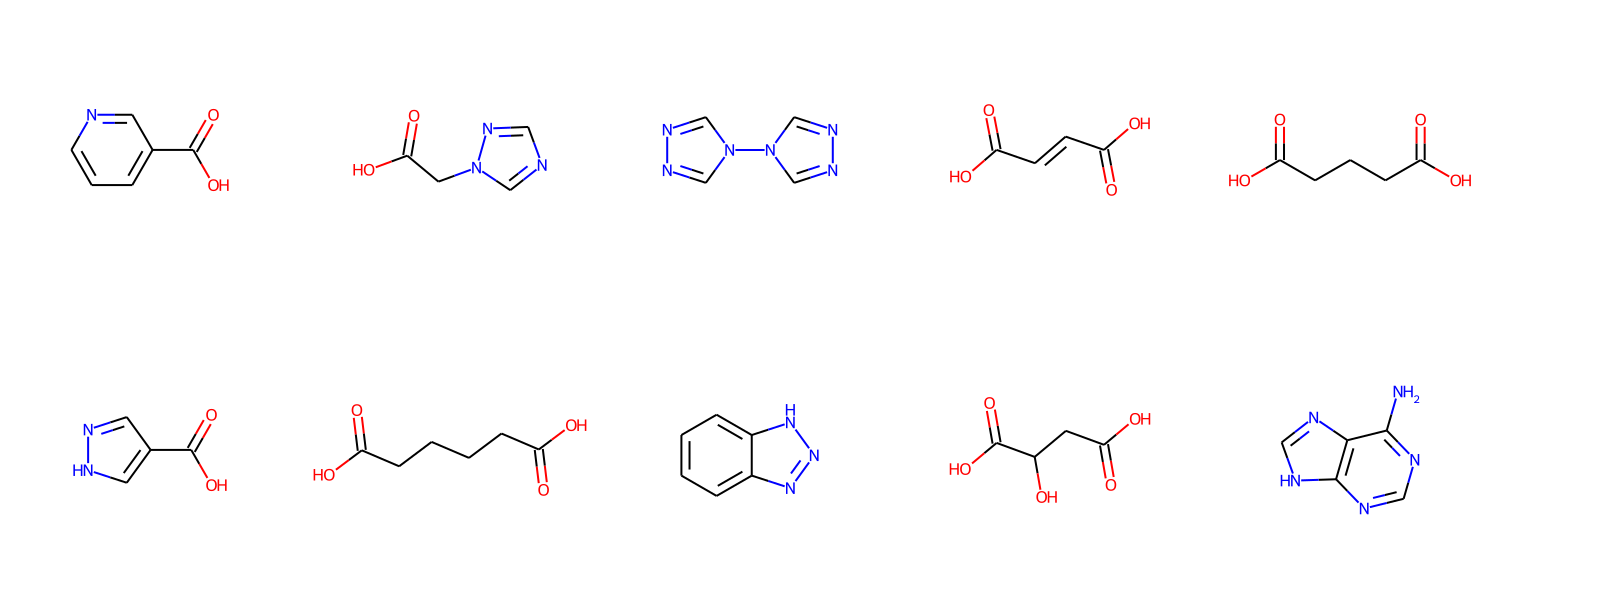

In [104]:
mol_list=[]
for smiles in linker:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)

drawer = rdMolDraw2D.MolDraw2DCairo(1600, 600, 300, 300)
opts = drawer.drawOptions()
opts.prepareMolsBeforeDrawing = True
drawer.DrawMolecules(mol_list[16:32])
drawer.FinishDrawing()

IPython.display.Image(drawer.GetDrawingText())

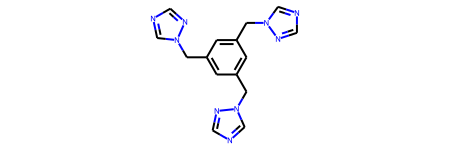

In [144]:
mol1 = Chem.MolFromSmiles(linker[150])
mol1

In [162]:
bi = {}
fp=Chem.RDKFingerprint(mol1, maxPath=5, fpSize=64)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
fp_arr

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [163]:
np.nonzero(fp_arr)
list(fp.GetOnBits())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63]

In [165]:
fp.GetOnBits()

In [166]:
prints = [(mol1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow=4, legends=[str(x) for x in fp.GetOnBits()])

KeyError: 0

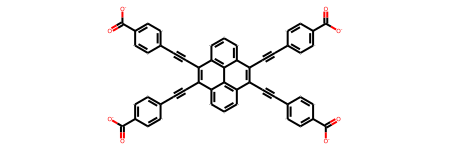

In [143]:
mol2 = Chem.MolFromSmiles(linker[-5])
mol2

# 2. Exploary Data Analysis (EDA)

In [173]:
df.head()

,1s,2s,3s,4s,5s,6s,7s,2p,3p,4p,...,linker1smi,oxidation_state,temperature,time,MolWt,TPSA,nRotB,HBD,HBA,LogP
0,2,2,2,2,0,0,0,6,6,0,...,O=C(O)c1ccc(COc2c3c(c(OCc4ccc(C(=O)O)cc4)c4c2C...,2,110,72.0,730.235539,93.06,8,2,4,10.2154
1,2,2,2,2,0,0,0,6,6,0,...,c1cc(CCc2ccncc2)ccn1,2,85,72.0,184.100048,25.78,3,0,2,2.2618
2,2,2,2,1,0,0,0,6,6,0,...,O=C(O)c1cc(C(=O)O)cc(-n2cc(-c3ccc(-c4cc(-c5ccc...,2,80,24.0,999.224867,315.93,15,6,15,8.6199
3,2,2,2,2,2,2,0,6,6,6,...,O=C(O)c1c2ccccc2c(C(=O)O)c2ccccc12,3,95,24.0,266.057909,74.60,2,2,2,3.3894
4,2,2,2,2,0,0,0,6,6,0,...,c1nnc[nH]1,2,80,72.0,69.032697,41.57,0,1,2,-0.1953


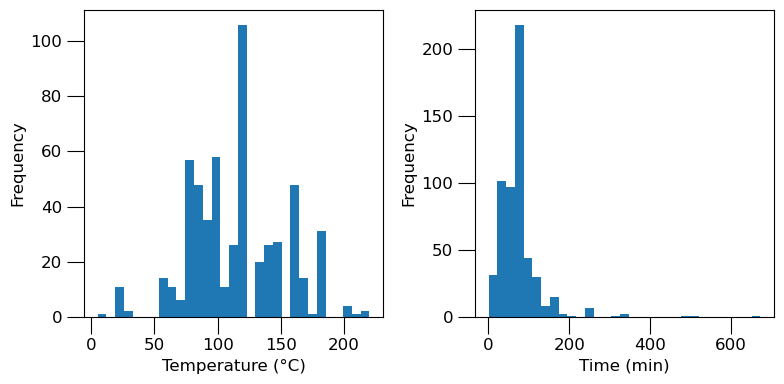

In [29]:
fig=plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
df['temperature'].plot.hist(bins=31)
plt.xlabel('Temperature (°C)')

plt.subplot(1,2,2)
df['time'].plot.hist(bins=31)
plt.xlabel('Time (min)')

fig.tight_layout()
plt.savefig('tt.tiff',dpi=300)

In [176]:
cat=['1s', '2s', '3s', '4s', '5s', '6s', '7s', '2p', '3p', '4p', '5p','6p', '3d', '4d', '5d', '6d', '4f', '5f', 
     'oxidation_state']
num=['MolWt', 'TPSA', 'nRotB','HBD', 'HBA', 'LogP']

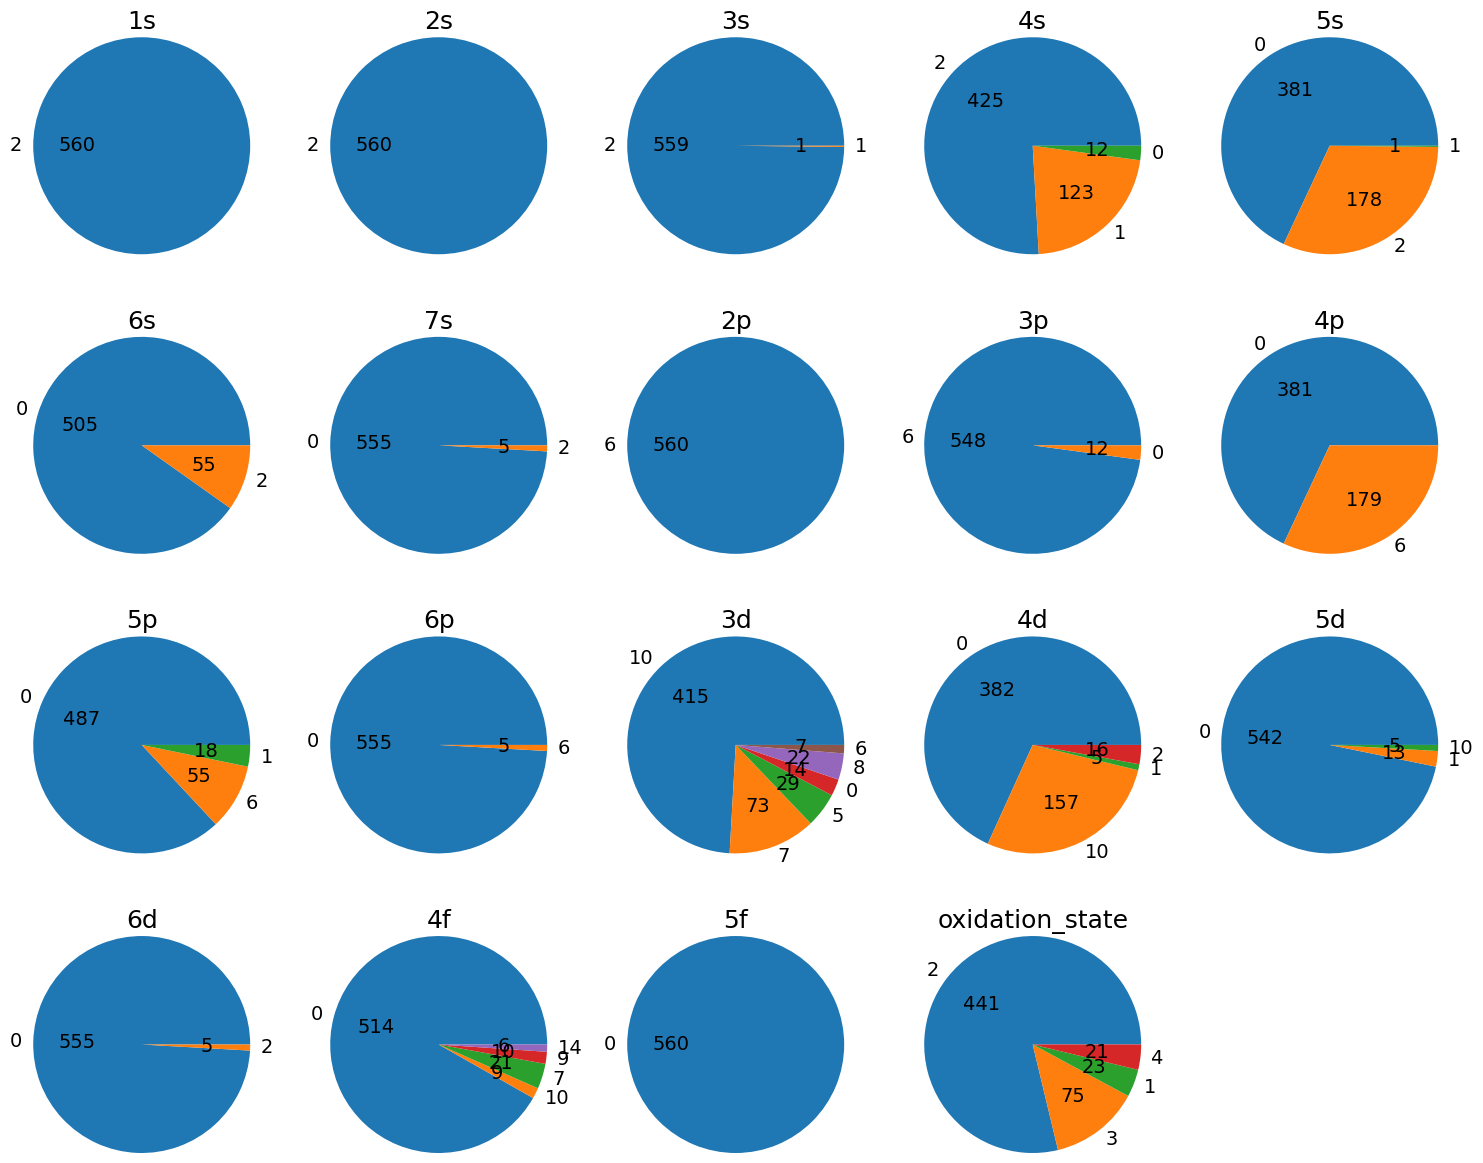

In [126]:
fig=plt.figure(figsize=(15,12))

for i in range(len(cat)):
    plt.subplot(4, 5, i+1)
    count=df[cat[i]].value_counts(sort=False)
    label=df[cat[i]].unique()
    total=len(df.index)
    def pct(x):
        return '{:0.0f}'.format(df.shape[0]*x/100)
        #return '{:.1f}%'.format(x)
        #return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

    plt.pie(count,labels=label,autopct=pct, radius=1.5, textprops={'fontsize': 14})
    plt.title(cat[i],y=1.1, fontsize=18)

plt.tight_layout()    
plt.savefig('pie.tiff',dpi=300)

C:\Users\JingyunYe\AppData\Local\Temp\ipykernel_22188\2779352596.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.swarmplot(x='3d', y="temperature", data=df, dodge=False, palette=palette)
C:\Users\JingyunYe\anaconda3\envs\my-rdkit-env\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\JingyunYe\anaconda3\envs\my-rdkit-env\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 57.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\JingyunYe\AppData\Local\Temp\ipykernel_22188\2779352596.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xl

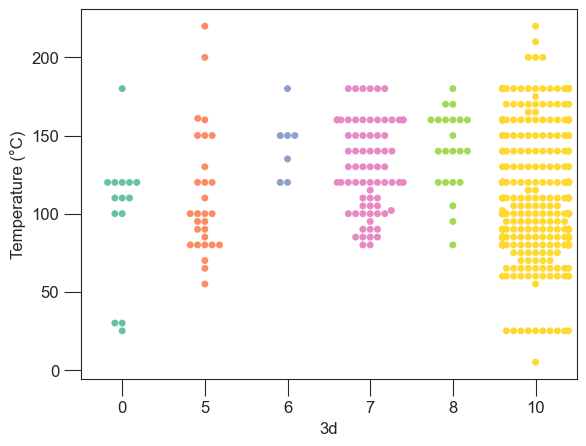

In [49]:
sns.set_style('white')
palette = 'Set2'

ax = sns.swarmplot(x='3d', y="temperature", data=df, dodge=False, palette=palette)

ax.tick_params(axis="x", bottom=True, top=False)
ax.tick_params(axis="y", left=True, right=False)


xlabels=['0','5','6','7','8','10']
ylabels='Temperature (°C)'
ax.set_xticklabels(xlabels)
plt.ylabel(ylabels)

plt.savefig('violin.tiff',dpi=300)
plt.show()

C:\Users\JingyunYe\AppData\Local\Temp\ipykernel_22188\4225010239.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.swarmplot(x=cat3[i], y="temperature", data=df, dodge=False, palette=palette)
C:\Users\JingyunYe\anaconda3\envs\my-rdkit-env\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 31.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\JingyunYe\anaconda3\envs\my-rdkit-env\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 78.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\JingyunYe\AppData\Local\Temp\ipykernel_22188\4225010239.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(

C:\Users\JingyunYe\anaconda3\envs\my-rdkit-env\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 70.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\JingyunYe\anaconda3\envs\my-rdkit-env\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 62.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\JingyunYe\anaconda3\envs\my-rdkit-env\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


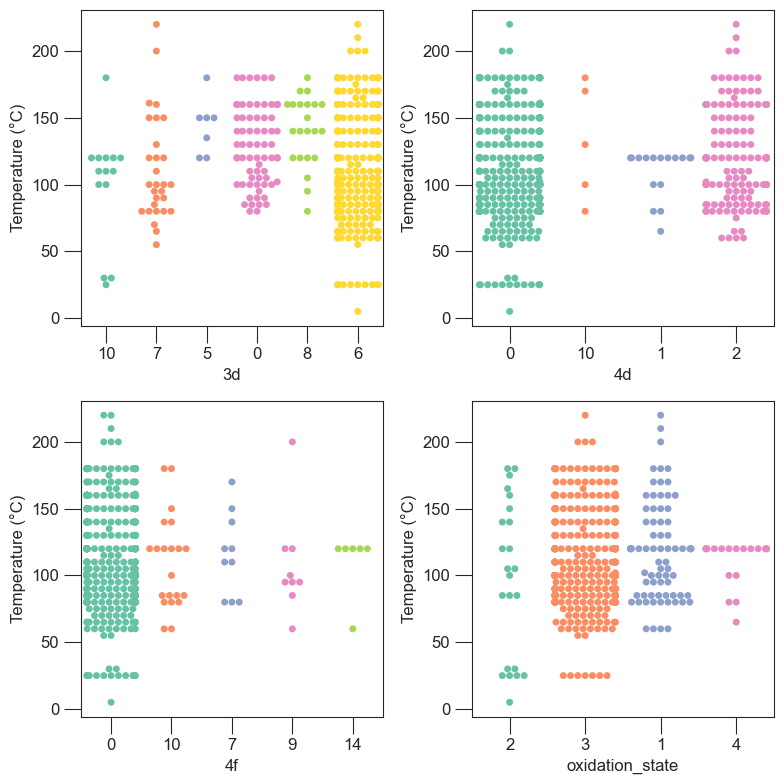

In [54]:
fig=plt.figure(figsize=(8,8))
sns.set_style('white')
palette = 'Set2'

cat3=['3d','4d','4f','oxidation_state']

for i in range(len(cat3)):
    ax=plt.subplot(2,2,i+1)
    ax=sns.swarmplot(x=cat3[i], y="temperature", data=df, dodge=False, palette=palette)
    ax.tick_params(axis="x", bottom=True, top=False)
    ax.tick_params(axis="y", left=True, right=False)

    xlabels=list(df[cat3[i]].unique())
    ylabels='Temperature (°C)'
    ax.set_xticklabels(xlabels)
    plt.ylabel(ylabels)

fig.tight_layout()
plt.savefig('violin.tiff',dpi=300)
plt.show()

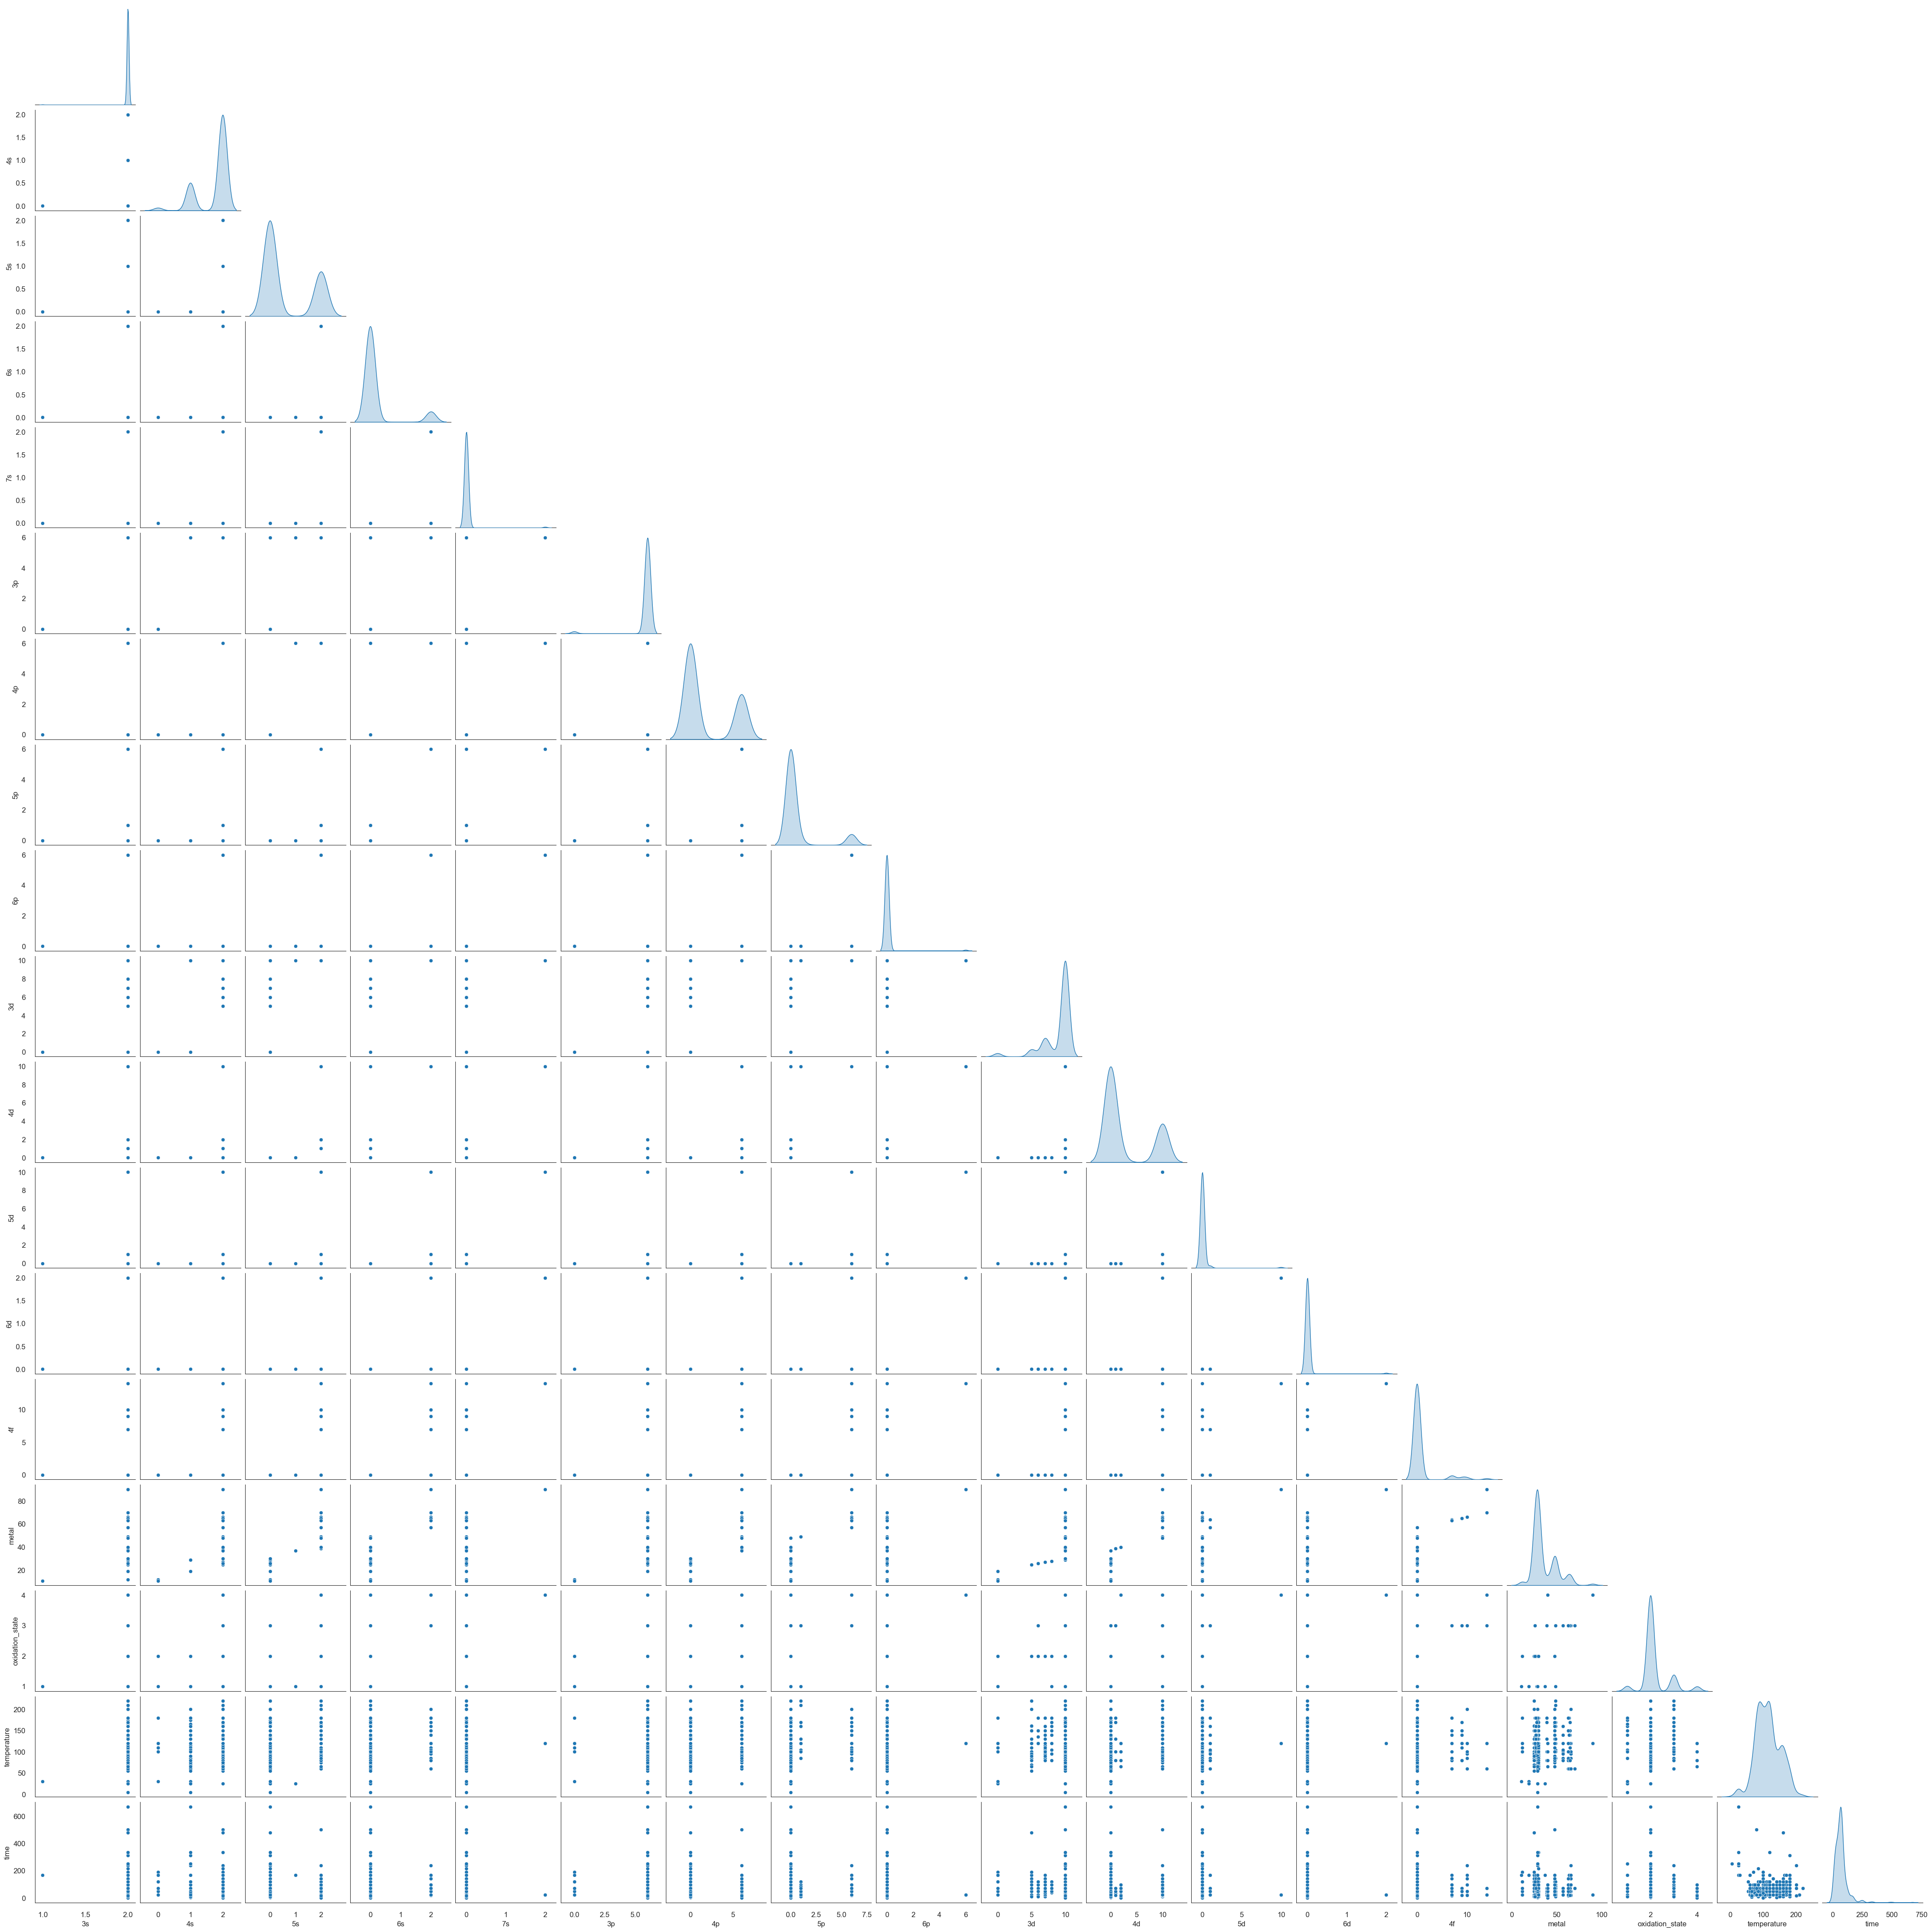

In [58]:
cat2=['3s', '4s', '5s', '6s', '7s', '3p', '4p', '5p','6p', '3d', '4d', '5d', '6d', '4f', 'metal', 'oxidation_state','temperature','time']
sns.pairplot(df[cat2],corner=True,diag_kind='kde')

C:\Users\JingyunYe\AppData\Local\Temp\ipykernel_22188\2513086471.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('heat.tiff',bbox_to_inches='tight')


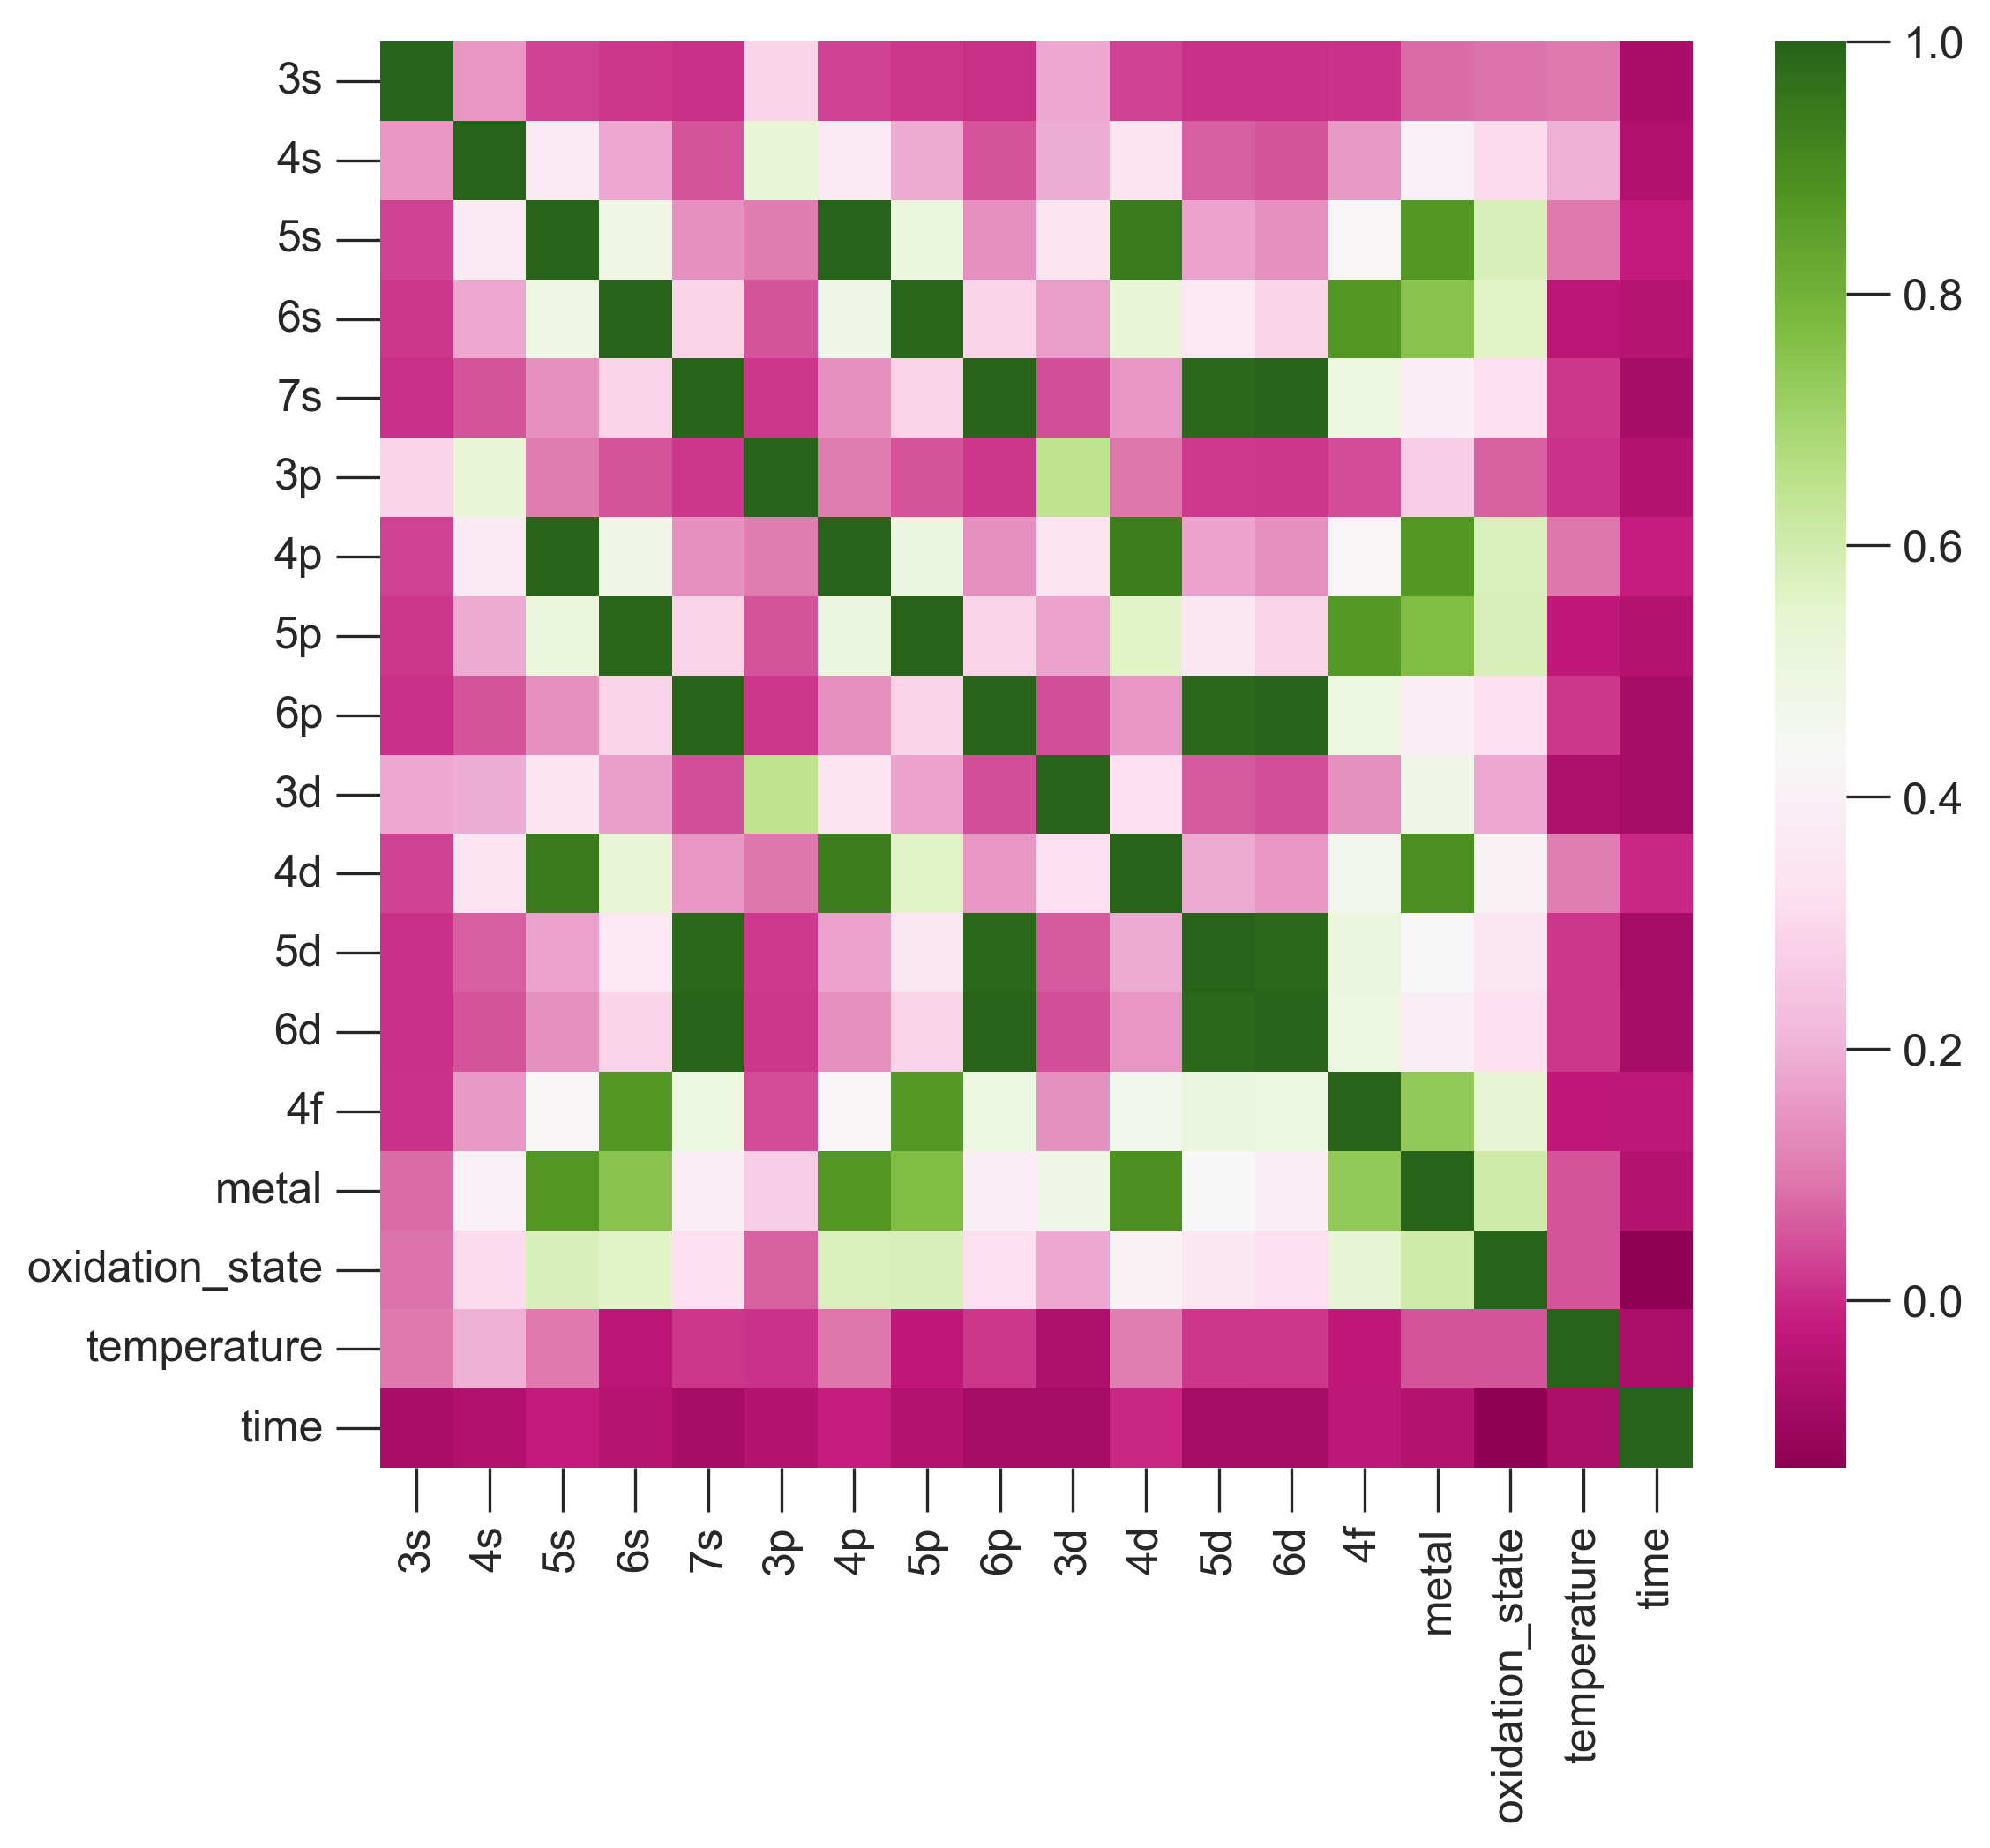

In [63]:
df_corr = df[cat2].corr(method = 'pearson')

fig=plt.figure(figsize=(8,7),dpi=300)
ax=sns.heatmap(df_corr,cmap='PiYG')
ax.tick_params(left=True, bottom=True)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.savefig('heat.tiff',bbox_to_inches='tight')

<Figure size 800x800 with 0 Axes>

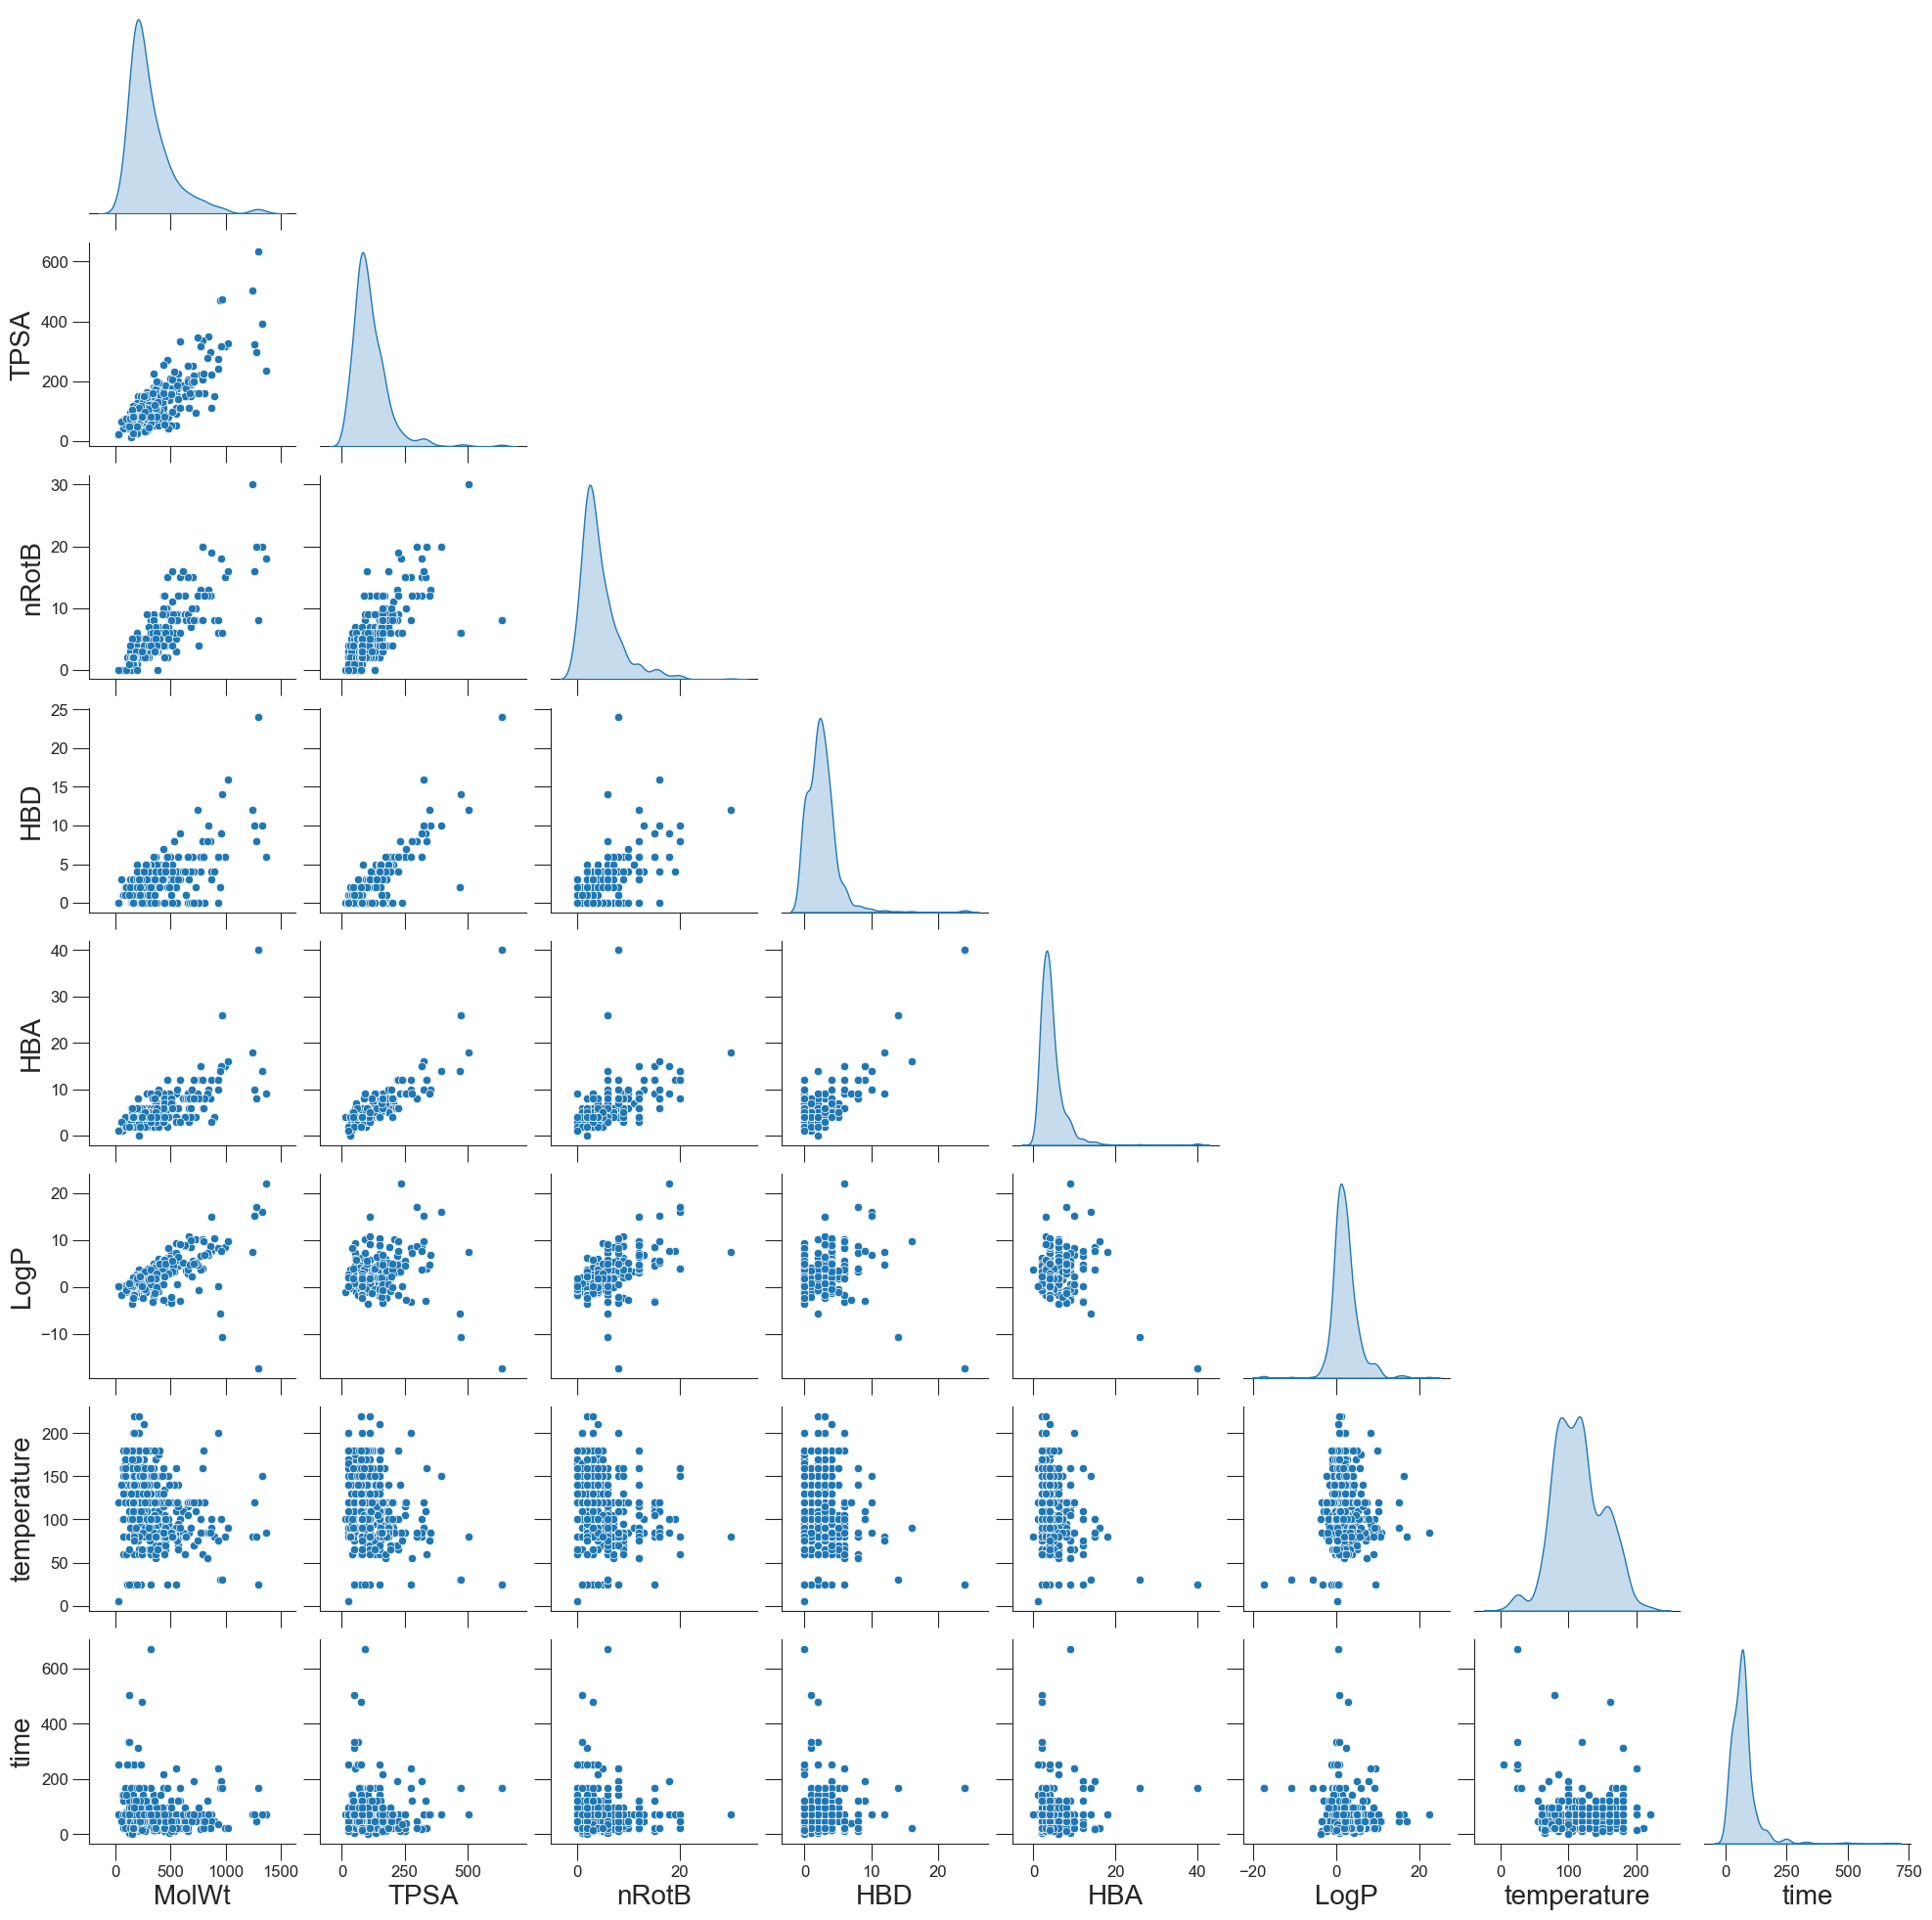

In [192]:
num2=['MolWt', 'TPSA', 'nRotB','HBD', 'HBA', 'LogP', 'temperature','time']

fig=plt.figure(figsize=(8,8))
ax=sns.pairplot(df[num2],corner=True,diag_kind='kde')
ax=sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.xticks(fontsize=16) 
plt.yticks(fontsize=16) 
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 20
plt.savefig('pairplot.tiff',dpi=300)
plt.show()

C:\Users\JingyunYe\AppData\Local\Temp\ipykernel_22188\4178381658.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('heat2.tiff',bbox_to_inches='tight')


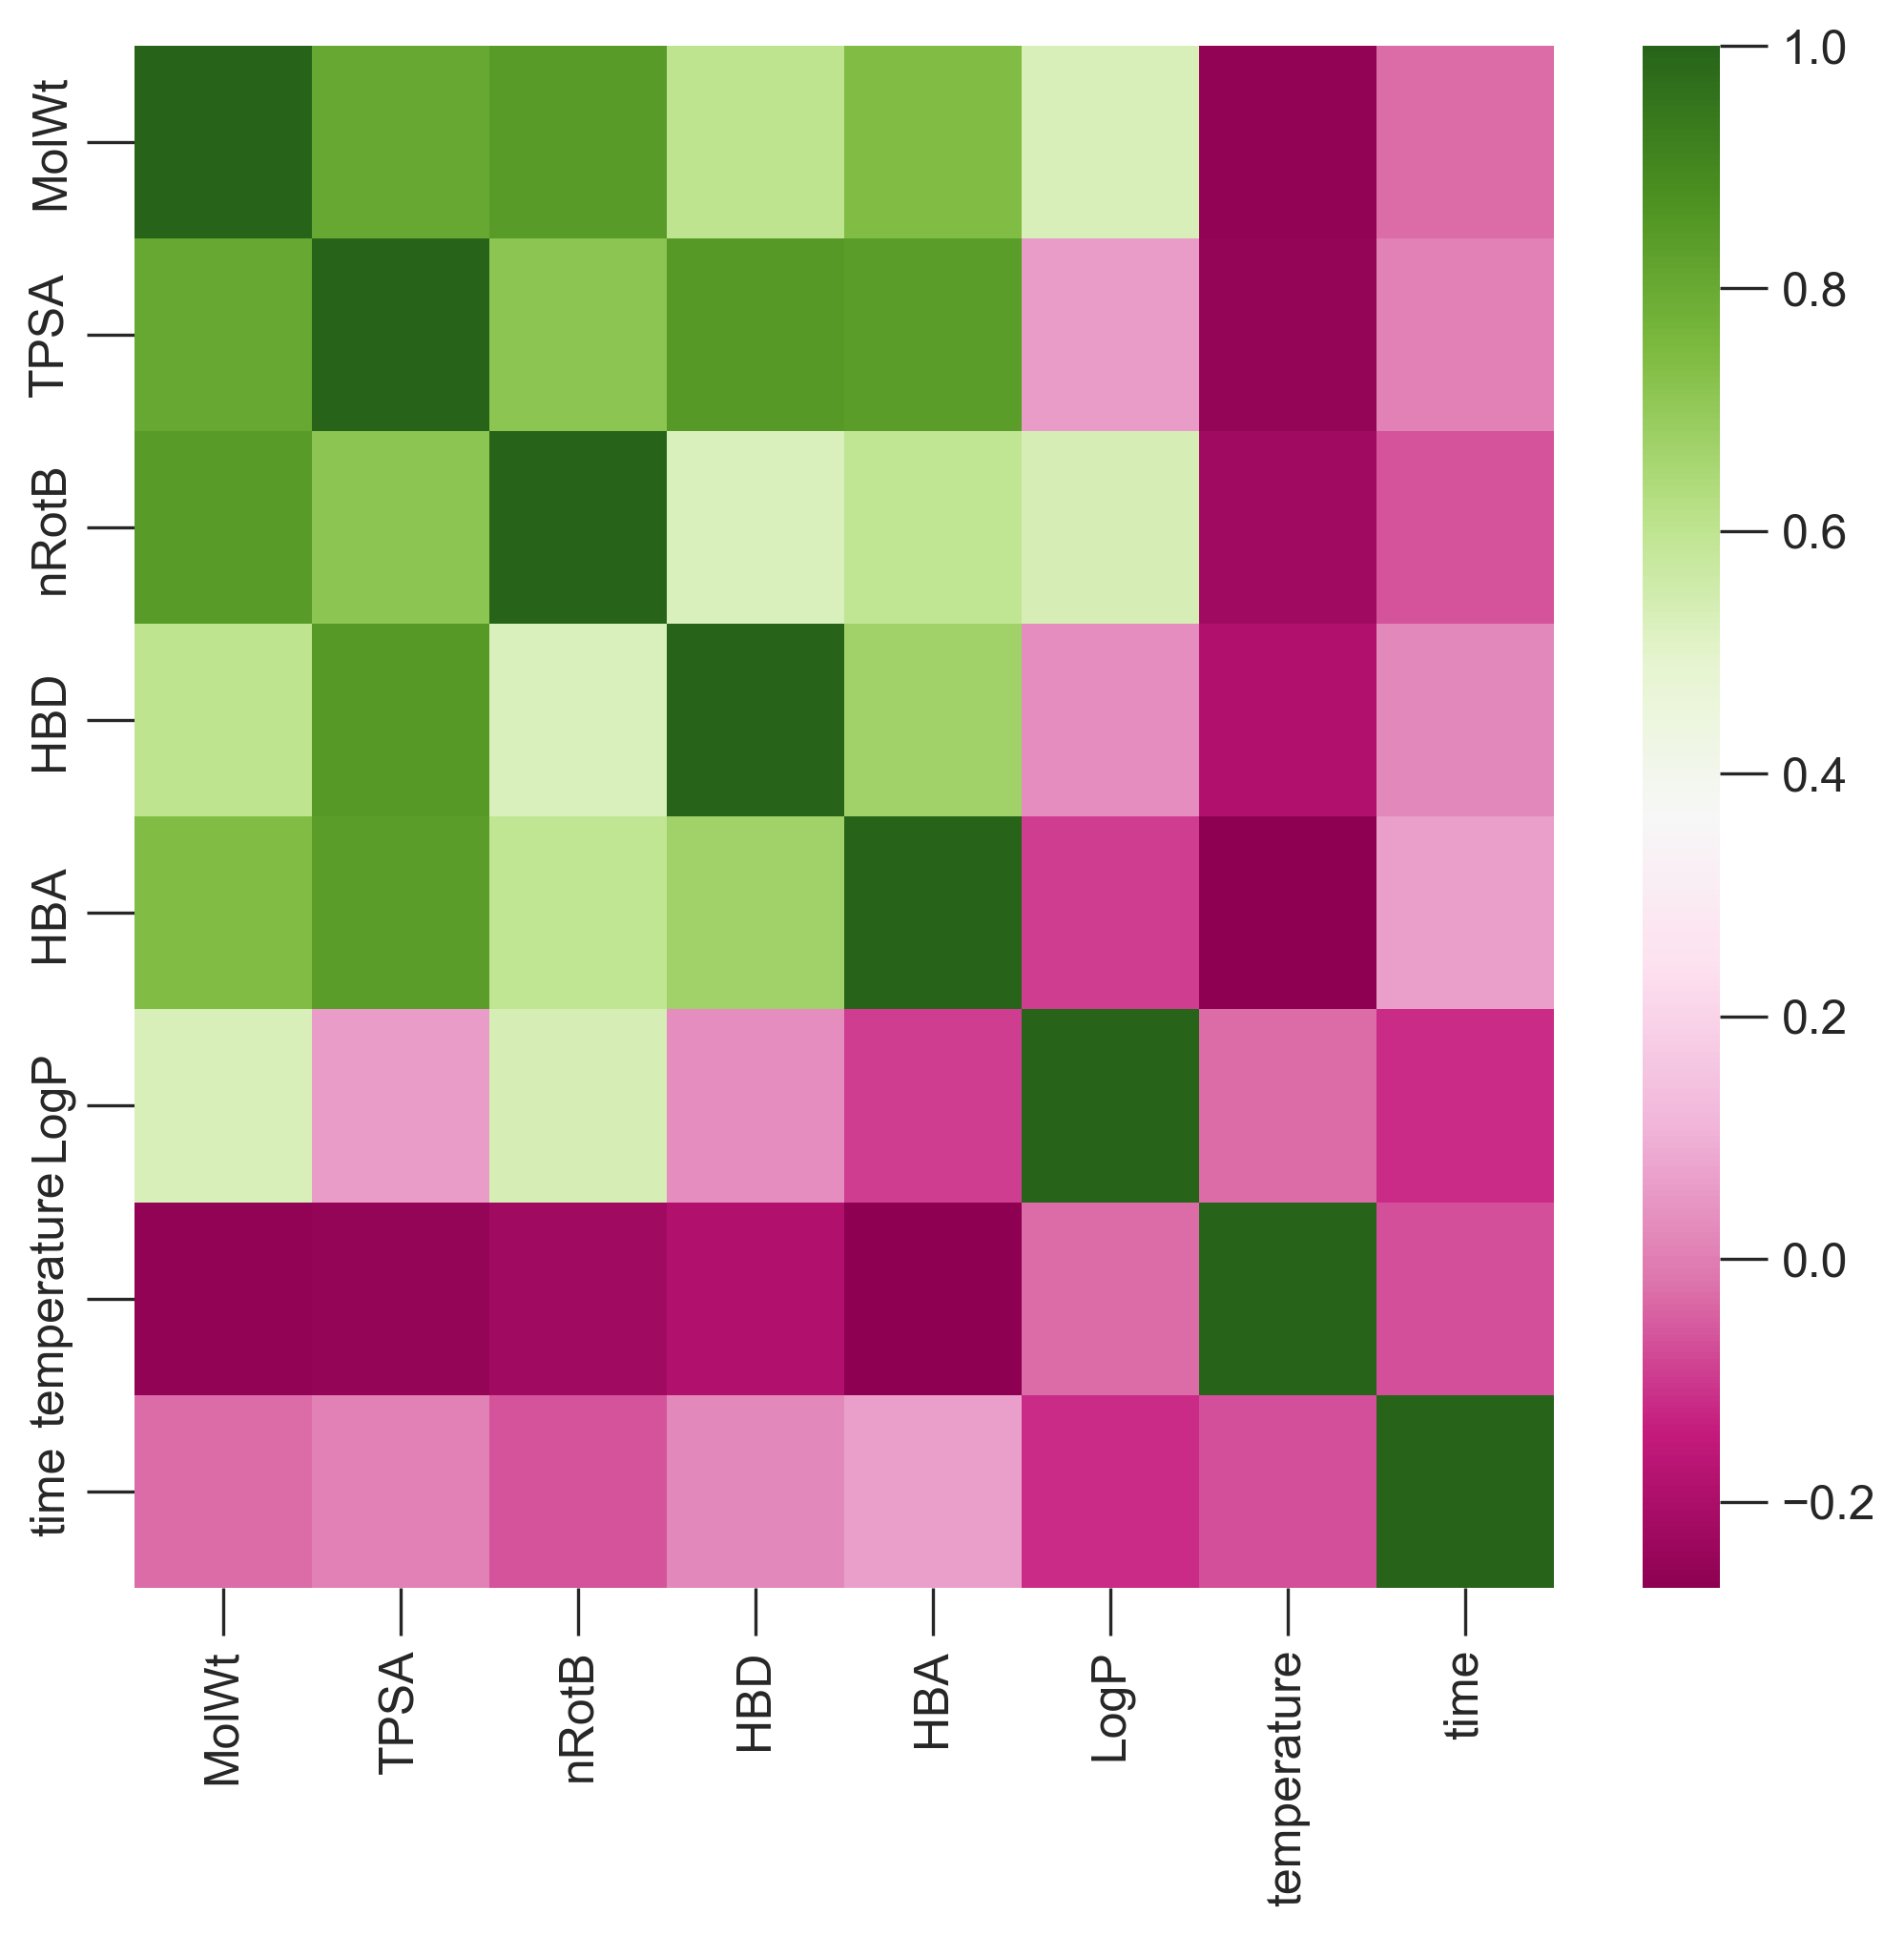

In [177]:

df_corr = df[num2].corr(method = 'pearson')

fig=plt.figure(figsize=(8,7),dpi=300)
ax=sns.heatmap(df_corr,cmap='PiYG')
ax.tick_params(left=True, bottom=True)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.savefig('heat2.tiff',bbox_to_inches='tight')

# 3. Feature Engineering

# New feature

- 3.1 remove 'linker1smi'
- 3.2 convert electronic structure using onehotcoding

In [193]:
df.head()

,1s,2s,3s,4s,5s,6s,7s,2p,3p,4p,...,linker1smi,oxidation_state,temperature,time,MolWt,TPSA,nRotB,HBD,HBA,LogP
0,2,2,2,2,0,0,0,6,6,0,...,O=C(O)c1ccc(COc2c3c(c(OCc4ccc(C(=O)O)cc4)c4c2C...,2,110,72.0,730.235539,93.06,8,2,4,10.2154
1,2,2,2,2,0,0,0,6,6,0,...,c1cc(CCc2ccncc2)ccn1,2,85,72.0,184.100048,25.78,3,0,2,2.2618
2,2,2,2,1,0,0,0,6,6,0,...,O=C(O)c1cc(C(=O)O)cc(-n2cc(-c3ccc(-c4cc(-c5ccc...,2,80,24.0,999.224867,315.93,15,6,15,8.6199
3,2,2,2,2,2,2,0,6,6,6,...,O=C(O)c1c2ccccc2c(C(=O)O)c2ccccc12,3,95,24.0,266.057909,74.60,2,2,2,3.3894
4,2,2,2,2,0,0,0,6,6,0,...,c1nnc[nH]1,2,80,72.0,69.032697,41.57,0,1,2,-0.1953


In [194]:
df.to_csv('./df.csv')

In [11]:
df1=pd.read_csv(r'./df.csv',index_col=0)

In [12]:
df1.drop(columns=['linker1smi','1s','2s','2p','5f'],axis=1,inplace=True)

In [13]:
df1.head()

,3s,4s,5s,6s,7s,3p,4p,5p,6p,3d,...,metal,oxidation_state,temperature,time,MolWt,TPSA,nRotB,HBD,HBA,LogP
0,2,2,0,0,0,6,0,0,0,10,...,30,2,110,72.0,730.235539,93.06,8,2,4,10.2154
1,2,2,0,0,0,6,0,0,0,10,...,30,2,85,72.0,184.100048,25.78,3,0,2,2.2618
2,2,1,0,0,0,6,0,0,0,10,...,29,2,80,24.0,999.224867,315.93,15,6,15,8.6199
3,2,2,2,2,0,6,6,6,0,10,...,66,3,95,24.0,266.057909,74.60,2,2,2,3.3894
4,2,2,0,0,0,6,0,0,0,10,...,30,2,80,72.0,69.032697,41.57,0,1,2,-0.1953


In [14]:
df1.columns

Index(['3s', '4s', '5s', '6s', '7s', '3p', '4p', '5p', '6p', '3d', '4d', '5d',
       '6d', '4f', 'metal', 'oxidation_state', 'temperature', 'time', 'MolWt',
       'TPSA', 'nRotB', 'HBD', 'HBA', 'LogP'],
      dtype='object')

### Transformer 3, Ordinary Encoder and One-Hot-Encoder

In [17]:
from sklearn.preprocessing import OneHotEncoder

es=['3s', '4s', '5s', '6s', '7s', '3p', '4p', '5p', '6p', '3d', '4d', '5d',
       '6d', '4f']

ohe = OneHotEncoder(handle_unknown='error')
ohe.fit(df1[es])
feat3=pd.DataFrame(ohe.transform(df1[es]).toarray())
feat3.columns=ohe.get_feature_names_out(df1[es].columns)

num=df1[['metal', 'oxidation_state', 'temperature', 'time', 'MolWt',
       'TPSA', 'nRotB', 'HBD', 'HBA', 'LogP']]
df2=pd.concat([feat3,num],axis=1)
df2       

,3s_1,3s_2,4s_0,4s_1,4s_2,5s_0,5s_1,5s_2,6s_0,6s_2,...,metal,oxidation_state,temperature,time,MolWt,TPSA,nRotB,HBD,HBA,LogP
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,30,2,110,72.0,730.235539,93.06,8,2,4,10.21540
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,30,2,85,72.0,184.100048,25.78,3,0,2,2.26180
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,29,2,80,24.0,999.224867,315.93,15,6,15,8.61990
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,66,3,95,24.0,266.057909,74.60,2,2,2,3.38940
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,30,2,80,72.0,69.032697,41.57,0,1,2,-0.19530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,40,4,120,72.0,708.107841,200.32,8,0,8,4.99360
556,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,30,2,75,96.0,163.004231,80.26,2,0,4,-1.78621
557,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,26,3,120,120.0,355.946576,120.39,3,0,8,-1.24421
558,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,90,4,120,24.0,159.980756,80.26,2,0,4,-2.38564


In [18]:
df2.columns

Index(['3s_1', '3s_2', '4s_0', '4s_1', '4s_2', '5s_0', '5s_1', '5s_2', '6s_0',
       '6s_2', '7s_0', '7s_2', '3p_0', '3p_6', '4p_0', '4p_6', '5p_0', '5p_1',
       '5p_6', '6p_0', '6p_6', '3d_0', '3d_5', '3d_6', '3d_7', '3d_8', '3d_10',
       '4d_0', '4d_1', '4d_2', '4d_10', '5d_0', '5d_1', '5d_10', '6d_0',
       '6d_2', '4f_0', '4f_7', '4f_9', '4f_10', '4f_14', 'metal',
       'oxidation_state', 'temperature', 'time', 'MolWt', 'TPSA', 'nRotB',
       'HBD', 'HBA', 'LogP'],
      dtype='object')

In [19]:
df2.to_csv('./feature_engineering.csv')

# ML 

### 1. Hyperparameter_test

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from math import sqrt

df2=pd.read_csv(r'./feature_engineering.csv')
features = list(df2.columns)
temp='temperature'
time='time'
features.remove(temp)
features.remove(time)


X=df2[features]
y = df2[temp]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models={'lr': LinearRegression(),
        'lasso': Lasso(),
        'lgr': LogisticRegression(),
        'svc': SVC(),
        'dt': DecisionTreeRegressor(),
        'rf': RandomForestRegressor(),
        'gbr': GradientBoostingRegressor(),
        'xgb': XGBRegressor()
        }

def Perf_train(y_train, y_train_pred):
    metrics={"r2": r2_score(y_train, y_train_pred),
             "mae": mean_absolute_error(y_train, y_train_pred),
             "rmse": mean_squared_error(y_train, y_train_pred,squared=False)
             }
    return metrics

def Perf_test(y_test, y_test_pred):
    metrics={"r2": r2_score(y_test, y_test_pred),
             "mae": mean_absolute_error(y_test, y_test_pred),
             "rmse": mean_squared_error(y_test, y_test_pred,squared=False)
             }
    return metrics

m=[]

for i in models.items():
    
    step=[('scale', MinMaxScaler()),
          (i)]
    ml=Pipeline(step)
    model=ml.fit(X_train,y_train)
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    metrics_train=Perf_train(y_train, y_train_pred)
    metrics_test=Perf_test(y_test, y_test_pred)

    m_train=pd.DataFrame.from_dict(metrics_train,orient='index')
    #m_train.reset_index(inplace=True)
    m_test=pd.DataFrame.from_dict(metrics_test,orient='index')
    #m_test.reset_index(inplace=True)
    
    m.append(m_train)
    m.append(m_test)   
    
m_perf=pd.concat(m, axis=1)
m_perf.columns=['lr_train', 'lr_test','lasso_train', 'lasso_test', 'lgr_train','lgr_test', 'svc_train','svc_test', 'tree_train','tree_test','rf_train','rf_test','gbr_train', 'gbr_test', 'xgb_train', 'xgb_test']

C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
M_default=m_perf.round(decimals=2)
#M_default=M_default.transpose()
M_default

,lr_train,lr_test,lasso_train,lasso_test,lgr_train,lgr_test,svc_train,svc_test,tree_train,tree_test,rf_train,rf_test,gbr_train,gbr_test,xgb_train,xgb_test
r2,0.20,0.13,0.09,0.09,-0.12,-0.56,-0.02,-0.00,1.0,-0.56,0.88,0.03,0.64,0.03,1.00,-0.10
mae,25.31,27.52,27.11,28.80,27.31,33.71,27.20,29.33,0.0,36.52,9.78,28.37,17.06,28.58,1.11,31.46
rmse,32.09,35.11,34.18,36.01,38.03,47.10,36.20,37.78,0.0,47.07,12.51,37.08,21.57,37.23,1.70,39.51


In [36]:
M_default=M_default.transpose()
M_default

,r2,mae,rmse
lr_train,0.20,25.31,32.09
lr_test,0.13,27.52,35.11
lasso_train,0.09,27.11,34.18
lasso_test,0.09,28.80,36.01
lgr_train,-0.12,27.31,38.03
lgr_test,-0.56,33.71,47.10
svc_train,-0.02,27.20,36.20
svc_test,-0.00,29.33,37.78
tree_train,1.00,0.00,0.00
tree_test,-0.56,36.52,47.07


In [45]:
tr=['lr_train', 'lasso_train', 'lgr_train','svc_train','tree_train','rf_train','gbr_train', 'xgb_train']
te=['lr_test','lasso_test', 'lgr_test', 'svc_test', 'tree_test','rf_test','gbr_test','xgb_test']
M_default.loc[tr]

,r2,mae,rmse
lr_train,0.20,25.31,32.09
lasso_train,0.09,27.11,34.18
lgr_train,-0.12,27.31,38.03
svc_train,-0.02,27.20,36.20
tree_train,1.00,0.00,0.00
rf_train,0.88,9.78,12.51
gbr_train,0.64,17.06,21.57
xgb_train,1.00,1.11,1.70


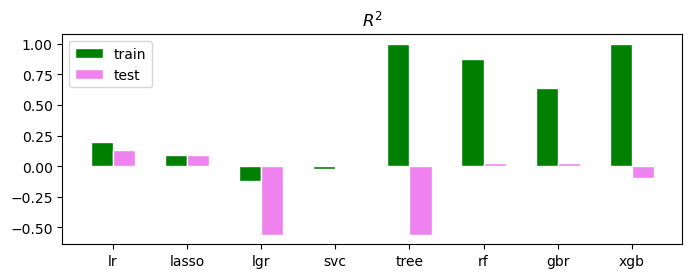

In [53]:
fig=plt.figure(figsize=(8,6))
xlabel=['lr', 'lasso', 'lgr','svc','tree','rf','gbr', 'xgb']

plt.subplot(2,1,1)
plt.bar(xlabel, height=M_default.loc[tr]['r2'], align='edge', width= -0.3, color='green',alpha=1, edgecolor='white')
plt.bar(xlabel, height=M_default.loc[te]['r2'], align='edge', width= 0.3, color='violet',alpha=1, edgecolor='white')
plt.legend(['train', 'test'])
plt.title('${R^2}$')
plt.savefig('r2.tiff',dpi=300)

<Axes: title={'center': 'Performance of models'}>

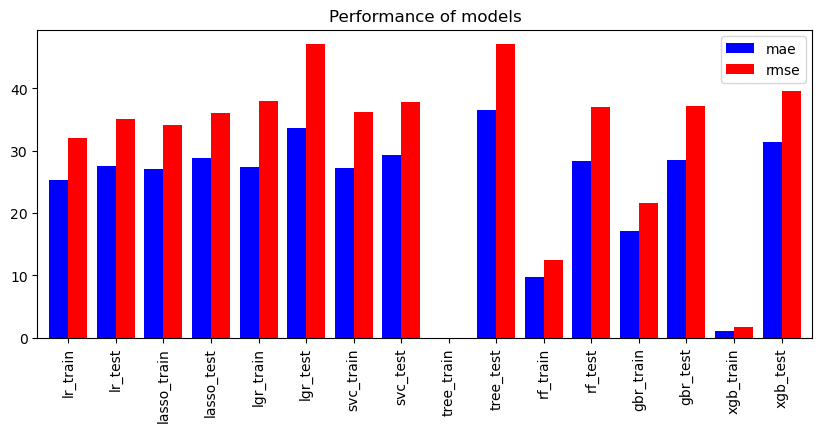

In [39]:
fig, ax = plt.subplots()
M_default[['mae','rmse']].plot(
    kind="bar",
    title="Performance of models",
    colormap=plt.cm.bwr,
    width=0.8,
    figsize=(10, 4),
    ax=ax,
)

# 2. Tune Hyperparameter

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from math import sqrt

df2=pd.read_csv(r'./feature_engineering.csv')
features = ['metal','oxidation_state', 'MolWt', 'TPSA', 'nRotB','HBD', 'HBA', 'LogP']
temp='temperature'
time='time'



X=df2[features]
y = df2[temp]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_params = {
    'LinearRegression': {
        'model': Pipeline([('poly', PolynomialFeatures()),
                           ('scale', MinMaxScaler()),
                           ('lr', LinearRegression())]),
        'params': {
            'poly__degree': [1, 2, 3]
        }
    },
    
    'Lasso': {
        'model': Pipeline([('poly', PolynomialFeatures()),
                           ('scale', MinMaxScaler()),
                           ('lasso', Lasso(random_state=42))]),
        'params': {
            'poly__degree': [1, 2, 3],
            'lasso__alpha': [0.5, 1, 3]
        }
    },
    
    
    'LogisticRegression': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('lgr', LogisticRegression(random_state=42))]),
        'params': {
            'lgr__C': [0.1, 1, 2, 3 ]
        }
    },
    
    'SVC': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('svc', SVC(random_state=42))]),
        'params': {
            'svc__C': [1, 3, 5, 10],
            'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
        }
    },
    
    'DecisionTreeRegressor': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('tree', DecisionTreeRegressor(random_state=42))]),
        'params': {
            'tree__max_depth': [2, 5, 10, 15],
            'tree__min_samples_leaf': [2, 4, 8]
        }
    },

    'RandomForest': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('rf', RandomForestRegressor(random_state=42))]),
        'params': {
            'rf__n_estimators': [5, 10, 50, 100],
            'rf__max_depth': [2, 5, 10, 15],
            'rf__min_samples_leaf': [2, 4, 8, 16],
            'rf__bootstrap': [True]
        }
    },
    
    'GradientBoosting': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('gbr', GradientBoostingRegressor(random_state=42))]),
        'params': {
            'gbr__n_estimators': [5, 10, 50, 100],
            'gbr__learning_rate': [0.01, 0.1, 0.2],
            'gbr__max_depth': [2, 5, 10, 15]
        }
    },


}

scores=make_scorer(r2_score, greater_is_better=True)

dic_hyper={}

for model_name, mp in model_params.items():
    grid_search = GridSearchCV(estimator=mp['model'],
                               param_grid=mp['params'],
                               cv=3,
                               n_jobs=-1,
                               scoring=scores
                              )
    grid_search.fit(X, y)
    dic_hyper[model_name]=[grid_search.best_params_,grid_search.best_score_]

C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
12 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_v

In [36]:
df_hyper_r2=pd.DataFrame.from_dict(dic_hyper,orient='index', columns=['best parameter','r2'])
df_hyper_r2

,best parameter,r2
LinearRegression,{'poly__degree': 1},-0.000899
Lasso,"{'lasso__alpha': 0.5, 'poly__degree': 1}",0.039907
LogisticRegression,{'lgr__C': 2},0.017189
SVC,"{'svc__C': 3, 'svc__kernel': 'linear'}",0.044873
DecisionTreeRegressor,"{'tree__max_depth': 2, 'tree__min_samples_leaf...",0.021919
RandomForest,"{'rf__bootstrap': True, 'rf__max_depth': 10, '...",0.100816
GradientBoosting,"{'gbr__learning_rate': 0.1, 'gbr__max_depth': ...",0.120603


In [37]:
df_hyper_r2

,best parameter,r2
LinearRegression,{'poly__degree': 1},-0.000899
Lasso,"{'lasso__alpha': 0.5, 'poly__degree': 1}",0.039907
LogisticRegression,{'lgr__C': 2},0.017189
SVC,"{'svc__C': 3, 'svc__kernel': 'linear'}",0.044873
DecisionTreeRegressor,"{'tree__max_depth': 2, 'tree__min_samples_leaf...",0.021919
RandomForest,"{'rf__bootstrap': True, 'rf__max_depth': 10, '...",0.100816
GradientBoosting,"{'gbr__learning_rate': 0.1, 'gbr__max_depth': ...",0.120603


In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from math import sqrt

df2=pd.read_csv(r'./feature_engineering.csv')
features = list(df2.columns)
temp='temperature'
time='time'
features.remove(temp)
features.remove(time)


X=df2[features]
y = df2[temp]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_params = {
    'LinearRegression': {
        'model': Pipeline([('poly', PolynomialFeatures()),
                           ('scale', MinMaxScaler()),
                           ('lr', LinearRegression())]),
        'params': {
            'poly__degree': [1, 2, 3]
        }
    },
    
    'Lasso': {
        'model': Pipeline([('poly', PolynomialFeatures()),
                           ('scale', MinMaxScaler()),
                           ('lasso', Lasso(random_state=42))]),
        'params': {
            'poly__degree': [1, 2, 3],
            'lasso__alpha': [0.5, 1, 3]
        }
    },
    
    
    'LogisticRegression': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('lgr', LogisticRegression(random_state=42))]),
        'params': {
            'lgr__C': [0.1, 1, 2, 3 ]
        }
    },
    
    'SVC': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('svc', SVC(random_state=42))]),
        'params': {
            'svc__C': [0.1, 1, 2, 3],
            'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
        }
    },
    
    'DecisionTreeRegressor': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('tree', DecisionTreeRegressor(random_state=42))]),
        'params': {
            'tree__max_depth': [5, 10, 15],
            'tree__min_samples_leaf': [2, 4, 8]
        }
    },

    'RandomForest': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('rf', RandomForestRegressor(random_state=42))]),
        'params': {
            'rf__n_estimators': [10, 50, 100],
            'rf__max_depth': [5, 10, 15],
            'rf__min_samples_leaf': [2, 4, 8],
            'rf__bootstrap': [True]
        }
    },
    
    'GradientBoosting': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('gbr', GradientBoostingRegressor(random_state=42))]),
        'params': {
            'gbr__n_estimators': [10, 50, 100],
            'gbr__learning_rate': [0.01, 0.1, 0.2],
            'gbr__max_depth': [5, 10, 15]
        }
    },


}

scores=make_scorer(mean_absolute_error, greater_is_better=False)

dic_hyper={}

for model_name, mp in model_params.items():
    grid_search = GridSearchCV(estimator=mp['model'],
                               param_grid=mp['params'],
                               cv=3,
                               n_jobs=-1,
                               scoring=scores
                              )
    grid_search.fit(X, y)
    dic_hyper[model_name]=[grid_search.best_params_,grid_search.best_score_]

C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:

In [25]:
df_hyper_mae=pd.DataFrame.from_dict(dic_hyper,orient='index', columns=['best parameter','mae'])
df_hyper_mae

,best parameter,mae
LinearRegression,{'poly__degree': 2},-1.518528e+10
Lasso,"{'lasso__alpha': 1, 'poly__degree': 3}",-2.794637e+01
LogisticRegression,{'lgr__C': 0.1},-2.927062e+01
SVC,"{'svc__C': 2, 'svc__kernel': 'sigmoid'}",-2.861242e+01
DecisionTreeRegressor,"{'tree__max_depth': 5, 'tree__min_samples_leaf...",-2.908757e+01
RandomForest,"{'rf__bootstrap': True, 'rf__max_depth': 10, '...",-2.699282e+01
GradientBoosting,"{'gbr__learning_rate': 0.1, 'gbr__max_depth': ...",-2.756014e+01


In [22]:
df2=pd.read_csv(r'./feature_engineering.csv')
features = list(df2.columns)
temp='temperature'
time='time'
features.remove(temp)
features.remove(time)


X=df2[features]
y = df2[temp]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_params = {
    'LinearRegression': {
        'model': Pipeline([('poly', PolynomialFeatures()),
                           ('scale', MinMaxScaler()),
                           ('lr', LinearRegression())]),
        'params': {
            'poly__degree': [1, 2, 3]
        }
    },
    
    'Lasso': {
        'model': Pipeline([('poly', PolynomialFeatures()),
                           ('scale', MinMaxScaler()),
                           ('lasso', Lasso(random_state=42))]),
        'params': {
            'poly__degree': [1, 2, 3],
            'lasso__alpha': [0.5, 1, 3]
        }
    },
    
    
    'LogisticRegression': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('lgr', LogisticRegression(random_state=42))]),
        'params': {
            'lgr__C': [0.1, 1, 2, 3 ]
        }
    },
    
    'SVC': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('svc', SVC(random_state=42))]),
        'params': {
            'svc__C': [0.1, 1, 2, 3],
            'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
        }
    },
    
    'DecisionTreeRegressor': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('tree', DecisionTreeRegressor(random_state=42))]),
        'params': {
            'tree__max_depth': [5, 10, 15],
            'tree__min_samples_leaf': [2, 4, 8]
        }
    },

    'RandomForest': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('rf', RandomForestRegressor(random_state=42))]),
        'params': {
            'rf__n_estimators': [10, 50, 100],
            'rf__max_depth': [5, 10, 15],
            'rf__min_samples_leaf': [2, 4, 8],
            'rf__bootstrap': [True]
        }
    },
    
    'GradientBoosting': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('gbr', GradientBoostingRegressor(random_state=42))]),
        'params': {
            'gbr__n_estimators': [10, 50, 100],
            'gbr__learning_rate': [0.01, 0.1, 0.2],
            'gbr__max_depth': [5, 10, 15]
        }
    },


}

scores=make_scorer(r2_score, greater_is_better=True)

dic_hyper={}

for model_name, mp in model_params.items():
    grid_search = GridSearchCV(estimator=mp['model'],
                               param_grid=mp['params'],
                               cv=5,
                               n_jobs=-1,
                               scoring=scores
                              )
    grid_search.fit(X, y)
    dic_hyper[model_name]=[grid_search.best_params_,grid_search.best_score_]

C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:

In [23]:
df_hyper_r2=pd.DataFrame.from_dict(dic_hyper,orient='index', columns=['best parameter','r2'])
df_hyper_r2

,best parameter,r2
LinearRegression,{'poly__degree': 2},-5.271664e+17
Lasso,"{'lasso__alpha': 0.5, 'poly__degree': 1}",4.336015e-02
LogisticRegression,{'lgr__C': 0.1},-2.982080e-02
SVC,"{'svc__C': 1, 'svc__kernel': 'rbf'}",7.218162e-03
DecisionTreeRegressor,"{'tree__max_depth': 5, 'tree__min_samples_leaf...",-2.924356e-02
RandomForest,"{'rf__bootstrap': True, 'rf__max_depth': 10, '...",7.732717e-02
GradientBoosting,"{'gbr__learning_rate': 0.01, 'gbr__max_depth':...",6.359399e-02


#!/usr/bin/python

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from math import sqrt

df2=pd.read_csv(r'./feature_engineering.csv')
features = list(df2.columns)
temp='temperature'
time='time'
features.remove(temp)
features.remove(time)


X=df2[features]
y = df2[temp]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_params = {
        'LinearRegression': {
        'model': Pipeline([('poly', PolynomialFeatures()),
                           ('scale', MinMaxScaler()),
                           ('lr', LinearRegression())]),
        'params': {
            'poly__degree': [1, 2, 3, 4, 5]
        }
    },

        'Lasso': {
        'model': Pipeline([('poly', PolynomialFeatures()),
                           ('scale', MinMaxScaler()),
                           ('lasso', Lasso(random_state=42))]),
        'params': {
            'poly__degree': [1, 2, 3, 4, 5],
            'lasso__alpha': [0.5, 1, 3, 5, 7, 9]
        }
    },


        'LogisticRegression': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('lgr', LogisticRegression(random_state=42))]),
        'params': {
            'lgr__C': [0.1, 1, 2, 3, 5, 7]
        }
    },

        'SVC': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('svc', SVC(random_state=42))]),
        'params': {
            'svc__C': [0.1, 1, 2, 3, 5, 7],
            'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
        }
    },

        'DecisionTreeRegressor': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('tree', DecisionTreeRegressor(random_state=42))]),
        'params': {
            'tree__max_depth': [5, 7, 9, 11, 13],
            'tree__min_samples_leaf': [1, 2, 4, 8]
        }
    },

    'RandomForest': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('rf', RandomForestRegressor(random_state=42))]),
        'params': {
            'rf__n_estimators': [10, 50, 100],
            'rf__max_depth': [5, 7, 9, 11, 13],
            'rf__min_samples_leaf': [1, 2, 4, 8],
            'rf__bootstrap': [True]
        }

    },

    'GradientBoosting': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('gbr', GradientBoostingRegressor(random_state=42))]),
        'params': {
            'gbr__n_estimators': [10, 50, 100],
            'gbr__learning_rate': [0.01, 0.1, 0.2],
            'gbr__max_depth': [5, 7, 9, 11, 13]
        }
    },

    'MPL': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('mpl', MLPRegressor(activation='relu',  random_state=42))]),
        'params': {
            'xgb__hidden_layer_sizes': [(100),(100, 50), (100,50, 30), (100, 50, 30, 20)],
            'mpl__solver': ['lbfgs', 'sgd', 'adam']
        }
    }
}


score= {'r2': make_scorer(r2_score, greater_is_better=True),
        'mae': make_scorer(mean_absolute_error, greater_is_better=False),
        'rmse':  make_scorer(mean_squared_error, greater_is_better=False)
                             }

g=[]

for i in score.keys():
    scores=score[i]

    dic_hyper={}

    for model_name, mp in model_params.items():
        grid_search = GridSearchCV(estimator=mp['model'],
                                   param_grid=mp['params'],
                                   cv=5,
                                   n_jobs=-1,
                                   scoring=scores
                                  )
        grid_search.fit(X, y)
        dic_hyper[model_name]=[grid_search.best_params_,grid_search.best_score_]

    i=pd.DataFrame.from_dict(dic_hyper,orient='index', columns=['best parameter',i])
    g.append(i)

gridcv=pd.concat([g],axis=1)

gridcv.to_csv('./gridcv.csv')

                

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.preprocessing import MinMaxScaler


features = list(df3.columns)
target='Churn'
features.remove(target)


X=df3[features]
y = df3[target].map(lambda x: 1 if x=='Yes' else 0)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models and their respective parameter grids
model_params = {
        'LogisticRegression': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('lr', LogisticRegression(random_state=42))]),
        'params': {
            'lr__C':[0.1, 1, 10]
        }
    },
    
            'SVC': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('svc', SVC(random_state=42))]),
        'params': {
            'svc__C':[0.1, 1, 10],
            'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
        }
    },
    
    'DecisionTreeClassifier': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('tree', DecisionTreeClassifier(random_state=42))]),
        'params': {
            'tree__max_depth':[5, 10, 15],
            'tree__min_samples_leaf':[8, 16, 24]
        }
    },

    'RandomForest': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('rf', RandomForestClassifier(random_state=42))]),
        'params': {
            'rf__n_estimators': [10, 50, 100],
            'rf__max_depth': [5, 10, 15],
            'rf__min_samples_leaf': [8, 16, 24],
            'rf__bootstrap': [True]
        }
    },
    
    'GradientBoosting': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('gbr', GradientBoostingClassifier(random_state=42))]),
        'params': {
            'gbr__n_estimators': [10, 50, 100],
            'gbr__learning_rate': [0.01, 0.1, 0.2],
            'gbr__max_depth': [5, 10, 15]
        }
    },

    'XGBoost': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('xgb', XGBClassifier(random_state=42))]),
        'params': {
            'xgb__n_estimators': [10, 50, 100],
            'xgb__max_depth': [5, 10, 15]
        }
    }
}

scores=make_scorer(recall_score, greater_is_better=True)

dic_hyper={}

for model_name, mp in model_params.items():
    grid_search = GridSearchCV(estimator=mp['model'],
                               param_grid=mp['params'],
                               cv=3,
                               n_jobs=-1,
                               scoring=scores
                              )
    grid_search.fit(X, y)
    dic_hyper[model_name]=[grid_search.best_params_,grid_search.best_score_]

C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final

In [23]:
df_hyper_recall=pd.DataFrame.from_dict(dic_hyper,orient='index', columns=['best parameter','recall_score'])
df_hyper_recall

,best parameter,recall_score
LogisticRegression,{'lr__C': 10},0.547887
SVC,"{'svc__C': 10, 'svc__kernel': 'poly'}",0.540931
DecisionTreeClassifier,"{'tree__max_depth': 10, 'tree__min_samples_lea...",0.525950
RandomForest,"{'rf__bootstrap': True, 'rf__max_depth': 10, '...",0.508293
GradientBoosting,"{'gbr__learning_rate': 0.1, 'gbr__max_depth': ...",0.531300
XGBoost,"{'xgb__max_depth': 5, 'xgb__n_estimators': 50}",0.526485


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.preprocessing import MinMaxScaler


features = list(df3.columns)
target='Churn'
features.remove(target)


X=df3[features]
y = df3[target].map(lambda x: 1 if x=='Yes' else 0)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models and their respective parameter grids
model_params = {
        'LogisticRegression': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('lr', LogisticRegression(random_state=42))]),
        'params': {
            'lr__C':[0.1, 1, 10],
            'lr__class_weight':['balanced']
        }
    },
    
            'SVC': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('svc', SVC(random_state=42))]),
        'params': {
            'svc__C':[0.1, 1, 10],
            'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
            'svc__class_weight':['balanced']
        }
    },
    
    'DecisionTreeClassifier': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('tree', DecisionTreeClassifier(random_state=42))]),
        'params': {
            'tree__max_depth':[5, 10, 15],
            'tree__min_samples_leaf':[8, 16, 24],
            'tree__class_weight':['balanced']
        }
    },

    'RandomForest': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('rf', RandomForestClassifier(random_state=42))]),
        'params': {
            'rf__n_estimators': [10, 50, 100],
            'rf__max_depth': [5, 10, 15],
            'rf__min_samples_leaf': [8, 16, 24],
            'rf__bootstrap': [True],
            'rf__class_weight':['balanced']
        }
    },
    
    'GradientBoosting': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('gbr', GradientBoostingClassifier(random_state=42))]),
        'params': {
            'gbr__n_estimators': [10, 50, 100],
            'gbr__learning_rate': [0.01, 0.1, 0.2],
            'gbr__max_depth': [5, 10, 15]
        }
    },

    'XGBoost': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('xgb', XGBClassifier(random_state=42))]),
        'params': {
            'xgb__n_estimators': [10, 50, 100],
            'xgb__max_depth': [5, 10, 15],
            'xgb__scale_pos_weight':[0, 1]
        }
    }
}

scores=make_scorer(roc_auc_score, greater_is_better=True)

dic_hyper={}

for model_name, mp in model_params.items():
    grid_search = GridSearchCV(estimator=mp['model'],
                               param_grid=mp['params'],
                               cv=3,
                               n_jobs=-1,
                               scoring=scores
                              )
    grid_search.fit(X, y)
    dic_hyper[model_name]=[grid_search.best_params_,grid_search.best_score_]


C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following er

In [25]:
df_hyper_roc_auc_score_balance=pd.DataFrame.from_dict(dic_hyper,orient='index', columns=['best parameter','roc_auc_score'])
df_hyper_roc_auc_score_balance.round(decimals=3)

,best parameter,roc_auc_score
LogisticRegression,"{'lr__C': 1, 'lr__class_weight': 'balanced'}",0.763
SVC,"{'svc__C': 0.1, 'svc__class_weight': 'balanced...",0.753
DecisionTreeClassifier,"{'tree__class_weight': 'balanced', 'tree__max_...",0.754
RandomForest,"{'rf__bootstrap': True, 'rf__class_weight': 'b...",0.769
GradientBoosting,"{'gbr__learning_rate': 0.1, 'gbr__max_depth': ...",0.713
XGBoost,"{'xgb__max_depth': 5, 'xgb__n_estimators': 10,...",0.714


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.preprocessing import MinMaxScaler


features = list(df3.columns)
target='Churn'
features.remove(target)


X=df3[features]
y = df3[target].map(lambda x: 1 if x=='Yes' else 0)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models and their respective parameter grids
model_params = {
        'LogisticRegression': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('lr', LogisticRegression(random_state=42))]),
        'params': {
            'lr__C':[0.1, 1, 10],
            'lr__class_weight':['balanced']
        }
    },
    
            'SVC': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('svc', SVC(random_state=42))]),
        'params': {
            'svc__C':[0.1, 1, 10],
            'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
            'svc__class_weight':['balanced']
        }
    },
    
    'DecisionTreeClassifier': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('tree', DecisionTreeClassifier(random_state=42))]),
        'params': {
            'tree__max_depth':[5, 10, 15],
            'tree__min_samples_leaf':[8, 16, 24],
            'tree__class_weight':['balanced']
        }
    },

    'RandomForest': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('rf', RandomForestClassifier(random_state=42))]),
        'params': {
            'rf__n_estimators': [10, 50, 100],
            'rf__max_depth': [5, 10, 15],
            'rf__min_samples_leaf': [8, 16, 24],
            'rf__bootstrap': [True],
            'rf__class_weight':['balanced']
        }
    },
    
    'GradientBoosting': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('gbr', GradientBoostingClassifier(random_state=42))]),
        'params': {
            'gbr__n_estimators': [10, 50, 100],
            'gbr__learning_rate': [0.01, 0.1, 0.2],
            'gbr__max_depth': [5, 10, 15]
        }
    },

    'XGBoost': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('xgb', XGBClassifier(random_state=42))]),
        'params': {
            'xgb__n_estimators': [10, 50, 100],
            'xgb__max_depth': [5, 10, 15],
            'xgb__scale_pos_weight':[0, 1]
        }
    }
}

scores=make_scorer(recall_score, greater_is_better=True)

dic_hyper={}

for model_name, mp in model_params.items():
    grid_search = GridSearchCV(estimator=mp['model'],
                               param_grid=mp['params'],
                               cv=3,
                               n_jobs=-1,
                               scoring=scores
                              )
    grid_search.fit(X, y)
    dic_hyper[model_name]=[grid_search.best_params_,grid_search.best_score_]

C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final

In [27]:
df_hyper_recall_score_balance=pd.DataFrame.from_dict(dic_hyper,orient='index', columns=['best parameter','recall_score'])
df_hyper_recall_score_balance.round(decimals=3)

,best parameter,recall_score
LogisticRegression,"{'lr__C': 10, 'lr__class_weight': 'balanced'}",0.796
SVC,"{'svc__C': 0.1, 'svc__class_weight': 'balanced...",0.833
DecisionTreeClassifier,"{'tree__class_weight': 'balanced', 'tree__max_...",0.797
RandomForest,"{'rf__bootstrap': True, 'rf__class_weight': 'b...",0.793
GradientBoosting,"{'gbr__learning_rate': 0.1, 'gbr__max_depth': ...",0.531
XGBoost,"{'xgb__max_depth': 5, 'xgb__n_estimators': 50,...",0.526


In [28]:
df_hyper_recall_score_balance['best parameter']['SVC']

{'svc__C': 0.1, 'svc__class_weight': 'balanced', 'svc__kernel': 'linear'}

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC


features = list(df3.columns)
target='Churn'
features.remove(target)


X=df3[features]
y = df3[target].map(lambda x: 1 if x=='Yes' else 0)

sm = SMOTEN(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models and their respective parameter grids
model_params = {
        'LogisticRegression': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('lr', LogisticRegression(random_state=42))]),
        'params': {
            'lr__C':[0.1, 1, 10],
            'lr__class_weight':['balanced']
        }
    },
    
            'SVC': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('svc', SVC(random_state=42))]),
        'params': {
            'svc__C':[0.1, 1, 10],
            'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
            'svc__class_weight':['balanced']
        }
    },
    
    'DecisionTreeClassifier': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('tree', DecisionTreeClassifier(random_state=42))]),
        'params': {
            'tree__max_depth':[5, 10, 15],
            'tree__min_samples_leaf':[8, 16, 24],
            'tree__class_weight':['balanced']
        }
    },

    'RandomForest': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('rf', RandomForestClassifier(random_state=42))]),
        'params': {
            'rf__n_estimators': [10, 50, 100],
            'rf__max_depth': [5, 10, 15],
            'rf__min_samples_leaf': [8, 16, 24],
            'rf__bootstrap': [True],
            'rf__class_weight':['balanced']
        }
    },
    
    'GradientBoosting': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('gbr', GradientBoostingClassifier(random_state=42))]),
        'params': {
            'gbr__n_estimators': [10, 50, 100],
            'gbr__learning_rate': [0.01, 0.1, 0.2],
            'gbr__max_depth': [5, 10, 15]
        }
    },

    'XGBoost': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('xgb', XGBClassifier(random_state=42))]),
        'params': {
            'xgb__n_estimators': [10, 50, 100],
            'xgb__max_depth': [5, 10, 15],
            'xgb__scale_pos_weight':[0, 1]
        }
    }
}

scores=make_scorer(recall_score, greater_is_better=True)

dic_hyper={}

for model_name, mp in model_params.items():
    grid_search = GridSearchCV(estimator=mp['model'],
                               param_grid=mp['params'],
                               cv=3,
                               n_jobs=-1,
                               scoring=scores
                              )
    grid_search.fit(X_sm, y_sm)
    dic_hyper[model_name]=[grid_search.best_params_,grid_search.best_score_]

C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final

In [63]:
df_hyper_recall_score_smoten=pd.DataFrame.from_dict(dic_hyper,orient='index', columns=['best parameter','recall_score'])
df_hyper_recall_score_smoten.round(decimals=3)

,best parameter,recall_score
LogisticRegression,"{'lr__C': 0.1, 'lr__class_weight': 'balanced'}",0.793
SVC,"{'svc__C': 0.1, 'svc__class_weight': 'balanced...",0.788
DecisionTreeClassifier,"{'tree__class_weight': 'balanced', 'tree__max_...",0.803
RandomForest,"{'rf__bootstrap': True, 'rf__class_weight': 'b...",0.820
GradientBoosting,"{'gbr__learning_rate': 0.01, 'gbr__max_depth':...",0.821
XGBoost,"{'xgb__max_depth': 5, 'xgb__n_estimators': 10,...",0.818


In [64]:
df_hyper_recall_score_smoten['best parameter']['GradientBoosting']

{'gbr__learning_rate': 0.01, 'gbr__max_depth': 5, 'gbr__n_estimators': 100}

# GradientBoosting

train
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3892
           1       0.83      0.86      0.84      3892

    accuracy                           0.84      7784
   macro avg       0.84      0.84      0.84      7784
weighted avg       0.84      0.84      0.84      7784

test
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1282
           1       0.83      0.86      0.84      1282

    accuracy                           0.84      2564
   macro avg       0.84      0.84      0.84      2564
weighted avg       0.84      0.84      0.84      2564



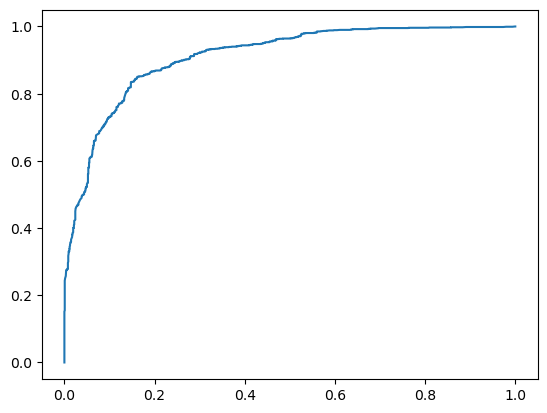

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC


features = list(df3.columns)
target='Churn'
features.remove(target)


X=df3[features]
y = df3[target].map(lambda x: 1 if x=='Yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
sm = SMOTEN(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
X_test_sm, y_test_sm = sm.fit_resample(X_test, y_test)


step=[('scale', MinMaxScaler()),
      ('gbr', GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=100, random_state=42))]

model=Pipeline(step)

gbr=model.fit(X_train_sm,y_train_sm)

y_train_pred=gbr.predict(X_train_sm)
y_test_pred=gbr.predict(X_test_sm)

print('train')
print(classification_report(y_train_sm,y_train_pred))
print('test')
print(classification_report(y_test_sm,y_test_pred))

fpr, tpr, thresholds = roc_curve(y_test_sm, (gbr.predict_proba(X_test_sm)[:, 1]),pos_label=1)
plt.plot(fpr, tpr,  label = 'Threshold=0.5') 

In [97]:
coef=pd.DataFrame(step[1][1].feature_importances_, index=gbr.feature_names_in_.tolist())
coef.round(decimals=3)

,0
gender,0.001
SeniorCitizen,0.001
Partner,0.002
Dependents,0.006
PhoneService,0.001
PaperlessBilling,0.002
MultipleLines_No,0.035
MultipleLines_No phone service,0.000
MultipleLines_Yes,0.000
InternetService_DSL,0.006


<Axes: >

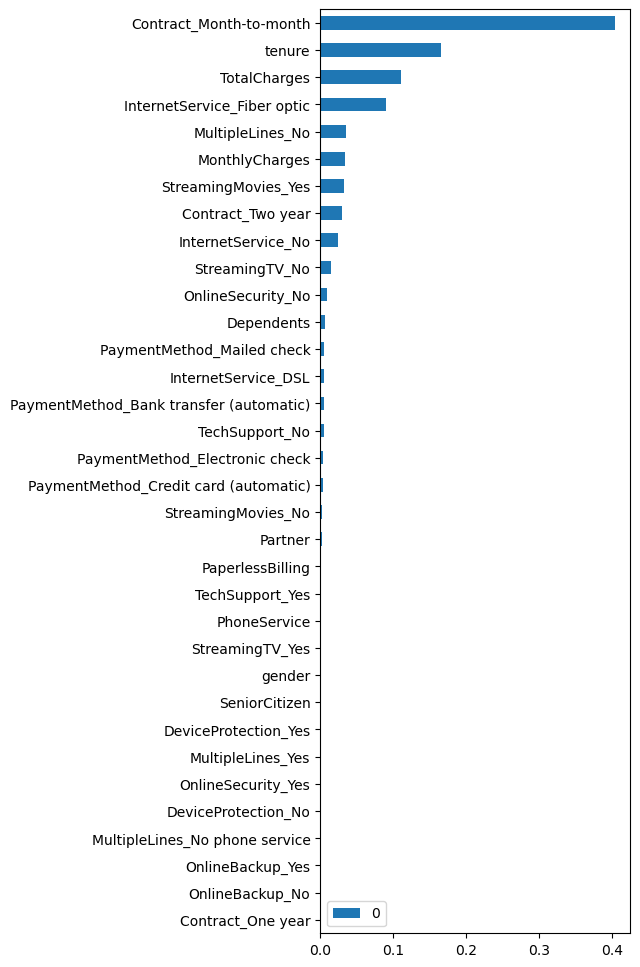

In [98]:
coef.sort_values(by=[0],ascending=True).plot(kind='barh', figsize=(4,12))

In [99]:
coef[0].abs().sort_values(ascending=False).head(10)

Contract_Month-to-month        0.403923
tenure                         0.165176
TotalCharges                   0.110093
InternetService_Fiber optic    0.089517
MultipleLines_No               0.035304
MonthlyCharges                 0.034676
StreamingMovies_Yes            0.032996
Contract_Two year              0.030626
InternetService_No             0.024326
StreamingTV_No                 0.015332
Name: 0, dtype: float64

# SVC

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.preprocessing import MinMaxScaler

features = list(df3.columns)
target='Churn'
features.remove(target)


X=df3[features]
y = df3[target].map(lambda x: 1 if x=='Yes' else 0)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
step=[('scale', MinMaxScaler()),
      ('svc', SVC(C=0.1, class_weight='balanced', kernel='linear', random_state=42))]
model=Pipeline(step)

kf = KFold(n_splits=5)

dic_train={'precision':[], 'recall':[],'f1':[],'roc_auc_score':[]}
dic_test={'precision':[], 'recall':[],'f1':[],'roc_auc_score':[]}

for i, (train_index, test_index) in enumerate(kf.split(X)):
    #print(f"Fold {i}:")
    #print(f"  Train: index={train_index}")
    #print(f"  Test:  index={test_index}")
    X_train=X.iloc[train_index]
    X_test=X.iloc[test_index]
    y_train=y.iloc[train_index]
    y_test=y.iloc[test_index]
    
    svc=model.fit(X_train,y_train)
    
    y_train_pred=svc.predict(X_train)
    y_test_pred=svc.predict(X_test)
    
    prec_train=precision_score(y_train, y_train_pred)
    prec_test=precision_score(y_test, y_test_pred)
    recal_train=recall_score(y_train, y_train_pred)
    recal_test=recall_score(y_test, y_test_pred)
    f1_train=f1_score(y_train, y_train_pred)
    f1_test=f1_score(y_test, y_test_pred)
    auc_train=roc_auc_score(y_train, y_train_pred)
    auc_test=roc_auc_score(y_test, y_test_pred)
    
    dic_train['precision'].append(prec_train)
    dic_train['recall'].append(recal_train)
    dic_train['f1'].append(f1_train)
    dic_train['roc_auc_score'].append(auc_train)

    dic_test['precision'].append(prec_test)
    dic_test['recall'].append(recal_test)
    dic_test['f1'].append(f1_test)
    dic_test['roc_auc_score'].append(auc_test)

kf5_train=pd.DataFrame.from_dict(dic_train).round(decimals=3)
kf5_test=pd.DataFrame.from_dict(dic_test).round(decimals=3)
print(kf5_train)
print(kf5_test)

train
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      3892
           1       0.46      0.83      0.59      1390

    accuracy                           0.70      5282
   macro avg       0.69      0.74      0.68      5282
weighted avg       0.79      0.70      0.72      5282

test
              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1282
           1       0.48      0.85      0.61       479

    accuracy                           0.71      1761
   macro avg       0.70      0.75      0.69      1761
weighted avg       0.80      0.71      0.72      1761



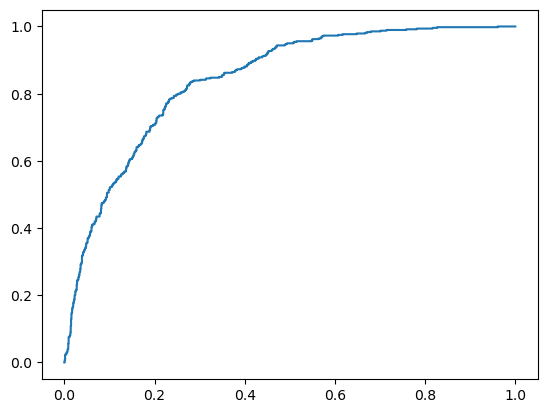

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

%matplotlib inline

features = list(df3.columns)
target='Churn'
features.remove(target)


X=df3[features]
y = df3[target].map(lambda x: 1 if x=='Yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
step=[('scale', MinMaxScaler()),
      ('svc', SVC(C=0.1, class_weight='balanced', kernel='linear', random_state=42,probability=True))]

model=Pipeline(step)

svc=model.fit(X_train,y_train)

y_train_pred=svc.predict(X_train)
y_test_pred=svc.predict(X_test)

print('train')
print(classification_report(y_train,y_train_pred))
print('test')
print(classification_report(y_test,y_test_pred))

fpr, tpr, thresholds = roc_curve(y_test, (svc.predict_proba(X_test)[:, 1]),pos_label=1)
plt.plot(fpr, tpr,  label = 'Threshold=0.5') 

coef=pd.DataFrame(step[1][1].coef_, columns=svc.feature_names_in_.tolist()).transpose()
coef.rename(columns={0: "coef"},inplace=True)
coef.round(decimals=2)
coef.sort_values(by=['coef'],ascending=False)

coef.sort_values(by=['coef'],ascending=False).plot(kind='barh', figsize=(4,12))

In [34]:
coef['coef'].abs().sort_values(ascending=False).head(10)

Contract_Month-to-month    1.332921
Contract_Two year          0.666565
Contract_One year          0.666356
InternetService_No         0.442208
InternetService_DSL        0.223064
StreamingTV_No             0.221944
StreamingMovies_No         0.221850
OnlineSecurity_No          0.221643
OnlineBackup_No            0.221599
TechSupport_No             0.221574
Name: coef, dtype: float64

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC

%matplotlib inline

features = list(df3.columns)
target='Churn'
features.remove(target)


X=df3[features]
y = df3[target].map(lambda x: 1 if x=='Yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
X_test_sm, y_test_sm = sm.fit_resample(X_test, y_test)

step=[('scale', MinMaxScaler()),
      ('svc', SVC(C=0.1, class_weight='balanced', kernel='linear', random_state=42,probability=True))]

model=Pipeline(step)

svc=model.fit(X_train_sm,y_train_sm)

y_train_pred=svc.predict(X_train_sm)
y_test_pred=svc.predict(X_test_sm)

print('train')
print(classification_report(y_train_sm,y_train_pred))
print('test')
print(classification_report(y_test_sm,y_test_pred))

train
              precision    recall  f1-score   support

           0       0.80      0.65      0.72      3892
           1       0.71      0.83      0.76      3892

    accuracy                           0.74      7784
   macro avg       0.75      0.74      0.74      7784
weighted avg       0.75      0.74      0.74      7784

test
              precision    recall  f1-score   support

           0       0.82      0.65      0.72      1282
           1       0.71      0.85      0.77      1282

    accuracy                           0.75      2564
   macro avg       0.76      0.75      0.75      2564
weighted avg       0.76      0.75      0.75      2564



In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC

%matplotlib inline

features = list(df3.columns)
target='Churn'
features.remove(target)


X=df3[features]
y = df3[target].map(lambda x: 1 if x=='Yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

sm = SMOTEN(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
X_test_sm, y_test_sm = sm.fit_resample(X_test, y_test)

step=[('scale', MinMaxScaler()),
      ('svc', SVC(C=0.1, class_weight='balanced', kernel='linear', random_state=42,probability=True))]

model=Pipeline(step)

svc=model.fit(X_train_sm,y_train_sm)

y_train_pred=svc.predict(X_train_sm)
y_test_pred=svc.predict(X_test_sm)

print('train')
print(classification_report(y_train_sm,y_train_pred))
print('test')
print(classification_report(y_test_sm,y_test_pred))

train
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      3892
           1       0.84      0.81      0.82      3892

    accuracy                           0.83      7784
   macro avg       0.83      0.83      0.83      7784
weighted avg       0.83      0.83      0.83      7784

test
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1282
           1       0.83      0.82      0.83      1282

    accuracy                           0.83      2564
   macro avg       0.83      0.83      0.83      2564
weighted avg       0.83      0.83      0.83      2564



In [59]:
coef=pd.DataFrame(step[1][1].coef_, columns=svc.feature_names_in_.tolist()).transpose()
coef.rename(columns={0: "coef"},inplace=True)
coef.round(decimals=2)
coef.sort_values(by=['coef'],ascending=False)

,coef
InternetService_Fiber optic,1.169031
OnlineSecurity_No,0.593680
OnlineSecurity_Yes,0.406459
TechSupport_No,0.400335
TechSupport_Yes,0.270815
PhoneService,0.212500
PaperlessBilling,0.203625
DeviceProtection_Yes,0.144870
StreamingMovies_Yes,0.077406
Contract_Month-to-month,0.048796


<Axes: >

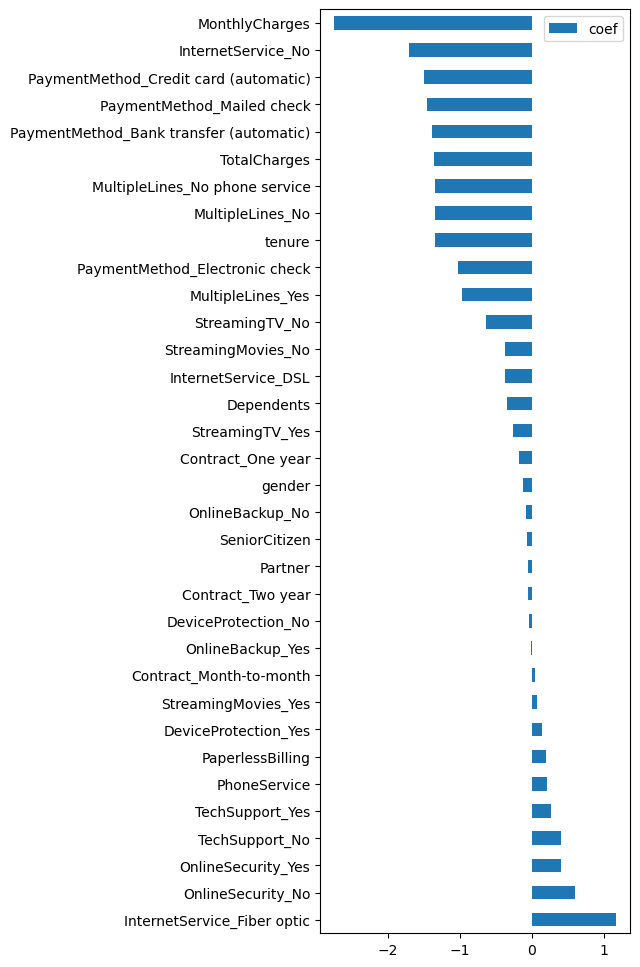

In [60]:
coef.sort_values(by=['coef'],ascending=False).plot(kind='barh', figsize=(4,12))

In [61]:
coef['coef'].abs().sort_values(ascending=False).head(10)

MonthlyCharges                             2.741871
InternetService_No                         1.700139
PaymentMethod_Credit card (automatic)      1.493727
PaymentMethod_Mailed check                 1.451824
PaymentMethod_Bank transfer (automatic)    1.381864
TotalCharges                               1.358460
MultipleLines_No phone service             1.346868
MultipleLines_No                           1.344711
tenure                                     1.341123
InternetService_Fiber optic                1.169031
Name: coef, dtype: float64

In [ ]:
fig=plt.figure(figsize=(18,8),dpi=300)

for i in range(len(feature)):
    ax=plt.subplot(2,4,i+1)
    df[feature[i]].plot(kind='hist',bins=30)
    ax.set(xlabel=feature[i])
    ax.set(ylabel=None)
    ax.xaxis.label.set_size(12)

plt.show()
plt.tight_layout()
plt.savefig('bar.tiff',dpi=300)